## Requirement
a) There are 14 variables available in this dataset. For each variable:
- Carry out appropriate data quality checks and clean each variable
- Given how each variable is distributed, please provide some key statistics that you can use you summarise each variable
- Provide hypotheses for the distribution of each variable and the data cleaning steps you carried out

b) Analyse the effect that each variable has on final race time:
- As part of your analysis, please investigate the combined impacts of some variables
- Please justify the reasoning behind the variables you chose to analyse together
- Give a recommendation on ways in which runners can reduce their run time for the Great North Run. Remember to back up your proposal with evidence!

c) Build a linear regression model to predict the race time of a participant X given the data provided. You may also use other types of models if you prefer.
- Use the previous question to inform which variables to include in your model
- Provide an explanation of your model and the parameters it has
- Some variables you may want to consider are gender, training frequency and club membership.
- Use your model to predict this runner’s finish time:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
marathon = pd.read_excel("/content/drive/MyDrive/Studing BA/Data file/2024 Data Challenge Raw Data.xlsx")

In [ ]:
marathon.head(5)

Unnamed: 0             club  position      time     id  gender  \
0        7448              NaN     14589  03:45:46   7426  female   
1        5363              NaN     14588  03:26:28   5345  female   
2       11420              NaN     14587  03:26:22  11387  female   
3        9408  Gump's training     14586  03:21:13   9384    male   
4        6604              NaN     14585  03:20:19   6585  female   

   trained_10_week  trained_im  has_trainer  cadence   age     bmi  \
0         0.789725    0.789725            0      163  36.0  999.00   
1         1.670838    1.670838            0      157  30.0   19.05   
2         1.917839    1.917839            0      165  38.0   21.13   
3         0.000000    0.000000            0      154  38.0   18.86   
4         0.000000    0.710092            0      166  43.0   19.75   

   n_marathons_run bib_colour    VO2_max  heart_rate  shoe_size  
0              0.0      green  12.718323      103.67          6  
1              0.0      green  12.718323       99.33          5  
2              0.0      green  13.460000       98.43          6  
3              0.0      green  20.010000      100.91          7  
4              0.0      green  12.718323      102.45          6

##1.Data cleaning##

### Due to numerous missing values in each column, removing all NA values may result in a smaller sample size, potentially introducing bias in the analysis and reducing statistical power. Therefore, I will address each variable one by one.




In [ ]:
marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14614 entries, 0 to 14613
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       14614 non-null  int64  
 1   club             3189 non-null   object 
 2   position         14614 non-null  int64  
 3   time             14567 non-null  object 
 4   id               14614 non-null  int64  
 5   gender           14614 non-null  object 
 6   trained_10_week  14540 non-null  float64
 7   trained_im       14463 non-null  float64
 8   has_trainer      14614 non-null  int64  
 9   cadence          14614 non-null  int64  
 10  age              14563 non-null  float64
 11  bmi              14614 non-null  float64
 12  n_marathons_run  14577 non-null  float64
 13  bib_colour       14614 non-null  object 
 14  VO2_max          14042 non-null  float64
 15  heart_rate       14064 non-null  float64
 16  shoe_size        14614 non-null  int64  
dtypes: float64(7

In [ ]:
marathon.describe()

Unnamed: 0      position            id  trained_10_week  \
count  14614.000000  14614.000000  14614.000000     14540.000000   
mean    7328.758656   7280.848159   7306.500000        -3.083608   
std     4231.313944   4219.205169   4218.842752        75.482450   
min        0.000000      1.000000      0.000000      -999.000000   
25%     3665.250000   3627.250000   3653.250000         1.183613   
50%     7328.500000   7280.500000   7306.500000         2.745488   
75%    10992.750000  10933.750000  10959.750000         4.023773   
max    14660.000000  14589.000000  14613.000000         6.919653   

         trained_im   has_trainer       cadence           age           bmi  \
count  14463.000000  14614.000000  14614.000000  14563.000000  14614.000000   
mean      -8.237465      0.078692    159.093540     36.102383     60.647316   
std      106.119666      0.269266     32.010322      9.891467    189.231907   
min     -999.000000      0.000000      1.000000     18.000000     15.050000   
25%        2.008240      0.000000    161.000000     30.000000     21.120000   
50%        3.251724      0.000000    165.000000     36.000000     22.610000   
75%        4.332161      0.000000    169.000000     42.000000     24.180000   
max        6.919653      1.000000    189.000000     83.000000    999.000000   

       n_marathons_run       VO2_max    heart_rate     shoe_size  
count     14577.000000  14042.000000  14064.000000  14614.000000  
mean       3084.041984     44.585019     81.290607      7.656631  
std       54865.742122     19.961066     10.775136      3.041907  
min          -9.000000     10.010000     58.680000      3.000000  
25%           3.000000     28.260000     72.207500      5.000000  
50%           6.000000     43.280000     80.740000      7.000000  
75%          11.000000     60.827500     89.952500     10.000000  
max     1000000.000000     95.850000    114.830000     13.000000

In [ ]:
marathon.isna().sum()

Unnamed: 0             0
club               11425
position               0
time                  47
id                     0
gender                 0
trained_10_week       74
trained_im           151
has_trainer            0
cadence                0
age                   51
bmi                    0
n_marathons_run       37
bib_colour             0
VO2_max              572
heart_rate           550
shoe_size              0
dtype: int64

In [ ]:
# Delete unknown columns
marathon = marathon.drop('Unnamed: 0', axis = 1)

In [ ]:
# Check duplicate value
print('Number of rows before:', marathon.shape[0])

marathon.drop_duplicates(inplace=True)

print('Number of rows after:', marathon.shape[0])


Number of rows before: 14614
Number of rows after: 14614


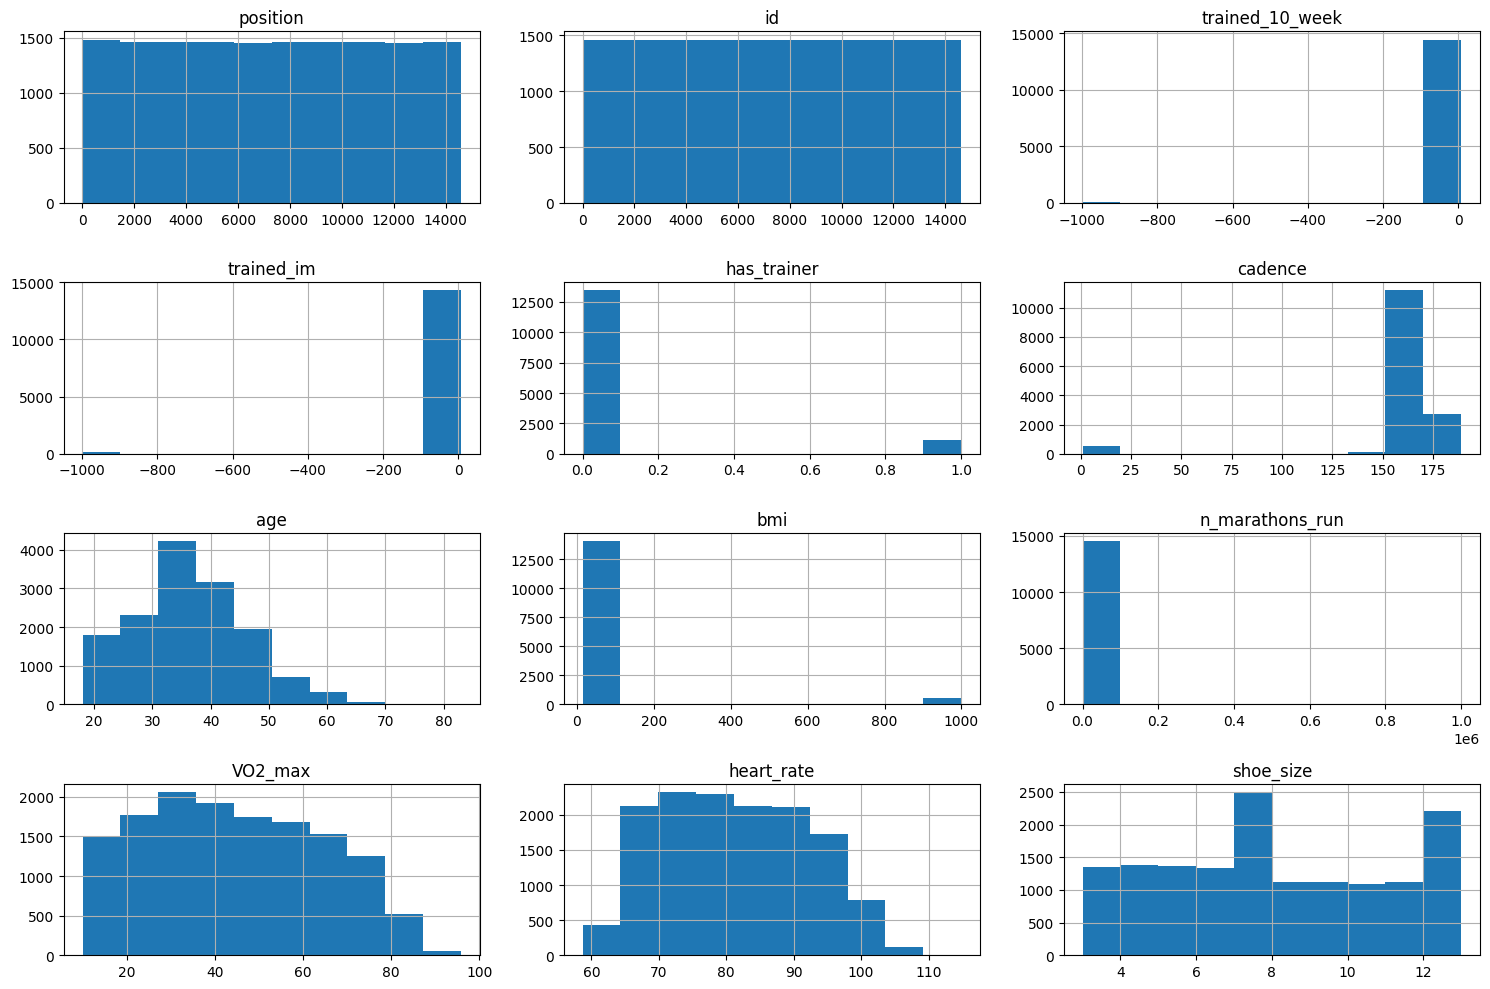

In [ ]:
# Check for outliners and negative values
numerical_cols = marathon.select_dtypes(include=np.number).columns

marathon[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

#### 1. time


In [ ]:
# Drop blank value in time - because applicant need to finish the race
marathon.dropna(subset=['time'], inplace=True)

In [ ]:
# Convert datatype of column time
marathon['time'] = pd.to_datetime(marathon['time'])


/tmp/ipython-input-1413327740.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marathon['time'] = pd.to_datetime(marathon['time'])


In [ ]:
# Convert time into second to as the time does not align with the position

def time_to_seconds(time_value):
    if pd.isna(time_value):
        return None
    # Assuming time_value is a datetime object after previous conversion
    try:
        return time_value.hour * 3600 + time_value.minute * 60 + time_value.second
    except AttributeError:
        # Fallback for unexpected formats, though should not be needed after to_datetime
        parts = str(time_value).split(':')
        if len(parts) == 3:
            try:
                h, m, s = map(int, parts)
                return h * 3600 + m * 60 + s
            except ValueError:
                return None # Handle cases where parts are not purely digits
        elif len(parts) == 2: # Handle cases like 'MM:SS' if they exist
             try:
                 m, s = map(int, parts)
                 return m * 60 + s
             except ValueError:
                 return None
        else:
            return None # Handle unexpected formats


# Apply the conversion and add the 'time_seconds' column to the 'marathon' DataFrame
marathon['time_seconds'] = marathon['time'].apply(time_to_seconds)

# Drop rows where time conversion failed (if any)
marathon.dropna(subset=['time_seconds'], inplace=True)

# The sorting and position update will be done in the next cell

In [ ]:
# Re-sort the DataFrame by 'time_seconds' to ensure correct positioning
marathon = marathon.sort_values(by='time_seconds', ascending=True).copy()

# Reset the index and create the 'position' column based on the sorted time
marathon.reset_index(drop=True, inplace=True)
marathon['position'] = marathon.index + 1

# Now 'marathon' dataframe has both 'time_seconds' and 'position' based on time

# Display the relevant columns to verify
print(marathon[['position', 'time', 'time_seconds']].head())
print(marathon[['position', 'time', 'time_seconds']].tail())

   position                time  time_seconds
0         1 2025-08-17 00:46:15          2775
1         2 2025-08-17 00:46:44          2804
2         3 2025-08-17 00:46:56          2816
3         4 2025-08-17 00:47:13          2833
4         5 2025-08-17 00:47:19          2839
       position                time  time_seconds
14562     14563 2025-08-17 03:20:19         12019
14563     14564 2025-08-17 03:21:13         12073
14564     14565 2025-08-17 03:26:22         12382
14565     14566 2025-08-17 03:26:28         12388
14566     14567 2025-08-17 03:45:46         13546


In [ ]:
# delete the original 'time' column and keep 'time_seconds'
marathon = marathon.drop(columns=['time'])

In [ ]:
marathon

club  position     id  gender  trained_10_week  \
0      Runway RAF running club         1   8039    male         5.536638   
1                 Road Runners         2   5346    male         5.258730   
2              Gump's training         3      1    male         4.890384   
3                    The Bolts         4  11389    male         4.693384   
4                   Mo running         5  11388    male         5.333973   
...                        ...       ...    ...     ...              ...   
14562                      NaN     14563   6585  female         0.000000   
14563          Gump's training     14564   9384    male         0.000000   
14564                      NaN     14565  11387  female         1.917839   
14565                      NaN     14566   5345  female         1.670838   
14566                      NaN     14567   7426  female         0.789725   

       trained_im  has_trainer  cadence   age     bmi  n_marathons_run  \
0        5.536638            1      173  25.0   26.30             10.0   
1        5.258730            1      177  61.0   25.40             21.0   
2        5.328192            1      174  41.0   26.99             25.0   
3        5.016947            1      176  42.0   25.53              0.0   
4        5.333973            1      161  44.0   26.33              1.0   
...           ...          ...      ...   ...     ...              ...   
14562    0.710092            0      166  43.0   19.75              0.0   
14563    0.000000            0      154  38.0   18.86              0.0   
14564    1.917839            0      165  38.0   21.13              0.0   
14565    1.670838            0      157  30.0   19.05              0.0   
14566    0.789725            0      163  36.0  999.00              0.0   

      bib_colour    VO2_max  heart_rate  shoe_size  time_seconds  
0            red  80.870000       64.87         12          2775  
1            red  82.880000       64.93         12          2804  
2            red  73.060000       66.58         12          2816  
3            red  73.840000       60.83          9          2833  
4            red  78.440000       64.08          9          2839  
...          ...        ...         ...        ...           ...  
14562      green  12.718323      102.45          6         12019  
14563      green  20.010000      100.91          7         12073  
14564      green  13.460000       98.43          6         12382  
14565      green  12.718323       99.33          5         12388  
14566      green  12.718323      103.67          6         13546  

[14567 rows x 16 columns]

#### 2. Train 10 week


In [ ]:
# Change negative value to 0 in train 10 week
marathon['trained_10_week'] = marathon['trained_10_week'].apply(lambda x: 0 if x < 0 else x)

In [ ]:
# Applying the mean imputation to handle missing value
marathon['trained_10_week'].fillna(marathon['trained_10_week'].mean(), inplace=True)

/tmp/ipython-input-2619609790.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marathon['trained_10_week'].fillna(marathon['trained_10_week'].mean(), inplace=True)


In [ ]:
marathon['trained_10_week'].describe()

count    14567.000000
mean         2.620704
std          1.691877
min          0.000000
25%          1.194947
50%          2.735884
75%          4.017421
max          6.919653
Name: trained_10_week, dtype: float64

#### 3. Train lm week


In [ ]:
# Change negative value to 0 in train im column
marathon['trained_im'] = marathon['trained_im'].apply(lambda x: 0 if x < 0 else x)

In [ ]:
# Applying the mean imputation to handle missing value
marathon['trained_im'].fillna(marathon['trained_im'].mean(), inplace=True)

/tmp/ipython-input-3094052149.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marathon['trained_im'].fillna(marathon['trained_im'].mean(), inplace=True)


In [ ]:
marathon['trained_im'].describe()

count    14567.000000
mean         3.092566
std          1.506948
min          0.000000
25%          2.028176
50%          3.233925
75%          4.319452
max          6.919653
Name: trained_im, dtype: float64

#### 4. VO2 and Heart Rate



In [ ]:
# Applying the mean imputation to handle missing value
marathon['VO2_max'].fillna(marathon['VO2_max'].mean(), inplace=True)
marathon['heart_rate'].fillna(marathon['heart_rate'].mean(), inplace=True)

/tmp/ipython-input-1890691919.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marathon['VO2_max'].fillna(marathon['VO2_max'].mean(), inplace=True)
/tmp/ipython-input-1890691919.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
marathon['VO2_max'].describe()

count    14567.000000
mean        44.612217
std         19.567307
min         10.010000
25%         28.855000
50%         44.612217
75%         60.080000
max         95.850000
Name: VO2_max, dtype: float64

In [ ]:
marathon['heart_rate'].describe()

count    14567.000000
mean        81.272823
std         10.570598
min         58.680000
25%         72.510000
50%         81.272823
75%         89.560000
max        114.830000
Name: heart_rate, dtype: float64

#### 5. BMI

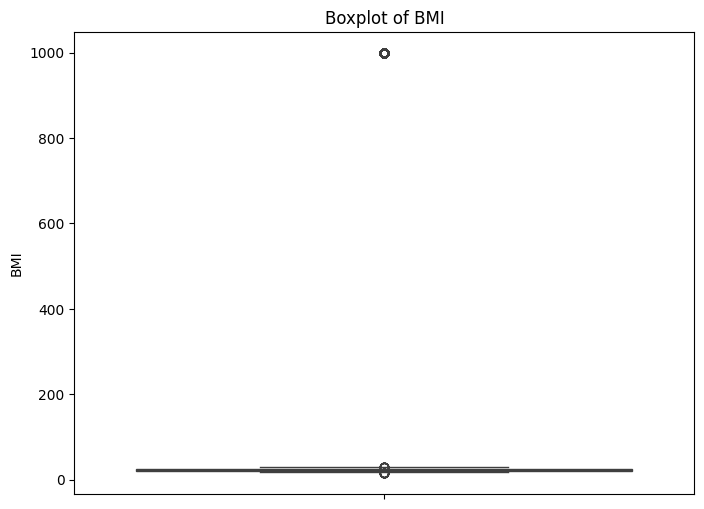

In [ ]:
# Check for outliners using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=marathon['bmi'])
plt.title('Boxplot of BMI')
plt.ylabel('BMI')
plt.show()

In [ ]:
# Filter outliners and change bmi outliers value to mean value
filter = marathon[marathon['bmi'] < 30]
filter['bmi'].mean()
marathon['bmi'] = marathon['bmi'].apply(lambda x:22.495630402171585  if x > 30 else x)

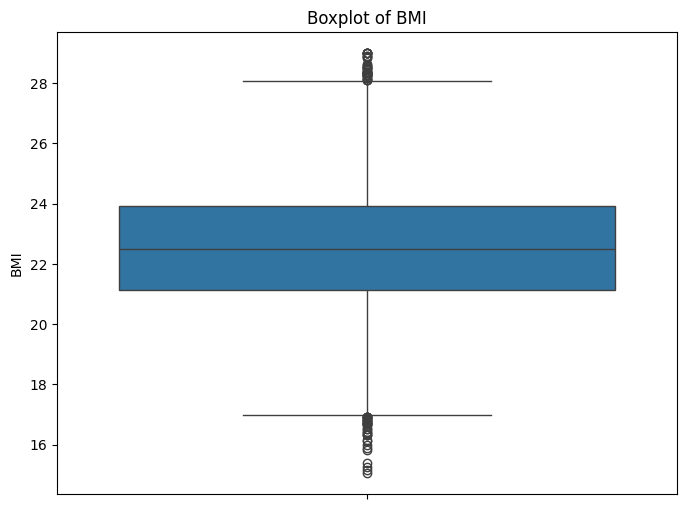

In [ ]:
# Double-check for outliners using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=marathon['bmi'])
plt.title('Boxplot of BMI')
plt.ylabel('BMI')
plt.show()

####6. n_marathons_run (Number of Marathon the runners has joined before)



In [ ]:
# check n marathons run negative value
marathon[marathon['n_marathons_run'] < 0]

club  position     id  gender  trained_10_week  trained_im  \
67        Mo running        68   5354    male         4.316001    5.095898   
74               NaN        75  13422    male         4.369030    5.204614   
99     Run every day       100  12757  female         5.589217    5.589217   
104     Road Runners       105   1967    male         4.445157    4.904048   
191        The Bolts       192   5363  female         5.521842    5.521842   
...              ...       ...    ...     ...              ...         ...   
12177            NaN     12178  13202  female         0.326863    1.302401   
12204            NaN     12205   1679  female         0.852021    1.172703   
12377            NaN     12378   4576    male         3.048904    3.048904   
12582            NaN     12583  12593  female         2.266165    2.266165   
12821            NaN     12822   6422  female         0.000000    1.137059   

       has_trainer  cadence   age    bmi  n_marathons_run bib_colour  VO2_max  \
67               1      189  18.0  25.03             -2.0        red    71.70   
74               0      182  34.0  21.97             -3.0        red    85.50   
99               1      165  40.0  26.46             -1.0        red    82.65   
104              0      169  18.0  25.27             -5.0        red    91.45   
191              1      176  43.0  21.82             -1.0        red    74.01   
...            ...      ...   ...    ...              ...        ...      ...   
12177            0      152  28.0  17.71             -1.0      green    30.14   
12204            0      159  25.0  21.54             -1.0      green    25.52   
12377            0      164  31.0  22.51             -1.0      green    14.82   
12582            0      152  32.0  22.01             -1.0      green    12.10   
12821            0      158  22.0  20.13             -1.0      green    12.66   

       heart_rate  shoe_size  time_seconds  
67          65.99          8          3322  
74          65.32         10          3341  
99          66.09          6          3392  
104         63.71          7          3406  
191         63.21          3          3585  
...           ...        ...           ...  
12177       94.29          5          7011  
12204       95.77          4          7021  
12377       95.12         10          7091  
12582       93.22          3          7179  
12821       94.79          5          7290  

[178 rows x 16 columns]

In [ ]:
# Change all the negative value n_marathons_run into positive
marathon['n_marathons_run'] = marathon['n_marathons_run'].apply(lambda x: abs(x) if x < 0 else x)


In [ ]:
# Make a filter along with change the outliers and missing value value to mean
filter_2 = marathon[marathon['n_marathons_run'] < 50]

filter_2['n_marathons_run'].mean()

marathon['n_marathons_run'] = marathon['n_marathons_run'].apply(lambda x:7.363130821632143  if x > 50 else x)

marathon['n_marathons_run'].fillna(marathon['n_marathons_run'].mean(), inplace=True)

/tmp/ipython-input-785247546.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marathon['n_marathons_run'].fillna(marathon['n_marathons_run'].mean(), inplace=True)


####7. Age

In [ ]:
marathon['age'].describe()

count    14516.000000
mean        36.105263
std          9.893728
min         18.000000
25%         30.000000
50%         36.000000
75%         42.000000
max         83.000000
Name: age, dtype: float64

In [ ]:
marathon.dropna(subset=['age'], inplace=True)

####8. Candence

In [ ]:
# find the mean of the candence but not include those have candence under 125

filtered_cadence = marathon[marathon['cadence'] >= 125]['cadence']
mean_cadence = filtered_cadence.mean()
print(f"Mean cadence for values >= 125: {mean_cadence}")

Mean cadence for values >= 125: 165.36299849645593


In [ ]:
# replace the cadence of those value below 125 to 165

marathon['cadence'] = marathon['cadence'].apply(lambda x: 165 if x < 125 else x)
marathon['cadence'].describe()

count    14516.000000
mean       165.349270
std          5.850304
min        139.000000
25%        161.000000
50%        165.000000
75%        169.000000
max        189.000000
Name: cadence, dtype: float64

####9. Shoe size

In [ ]:
# prompt: showing all the unique value in the shoe size

marathon['shoe_size'].unique()

array([12,  9,  8, 11,  5,  7, 10,  6, 13,  3,  4])

## Encoding

In [ ]:
# Transfer male to 0 and female to 1

marathon['gender'] = marathon['gender'].map({'male': 0, 'female': 1})
marathon.head()

club  position     id  gender  trained_10_week  \
0  Runway RAF running club         1   8039       0         5.536638   
1             Road Runners         2   5346       0         5.258730   
2          Gump's training         3      1       0         4.890384   
3                The Bolts         4  11389       0         4.693384   
4               Mo running         5  11388       0         5.333973   

   trained_im  has_trainer  cadence   age    bmi  n_marathons_run bib_colour  \
0    5.536638            1      173  25.0  26.30             10.0        red   
1    5.258730            1      177  61.0  25.40             21.0        red   
2    5.328192            1      174  41.0  26.99             25.0        red   
3    5.016947            1      176  42.0  25.53              0.0        red   
4    5.333973            1      161  44.0  26.33              1.0        red   

   VO2_max  heart_rate  shoe_size  time_seconds  
0    80.87       64.87         12          2775  
1    82.88       64.93         12          2804  
2    73.06       66.58         12          2816  
3    73.84       60.83          9          2833  
4    78.44       64.08          9          2839

In [ ]:
#  Change the blank value in club into "No"
marathon['club'].fillna('No', inplace=True)

/tmp/ipython-input-1238561208.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marathon['club'].fillna('No', inplace=True)


In [ ]:
#  create a variable column name " speed" caculate by using 21083 divide with the time second of the runner

marathon['speed'] = 21083 / marathon['time_seconds']


### Data Analysis


In [ ]:
marathon.describe()

position            id        gender  trained_10_week  \
count  14516.000000  14516.000000  14516.000000     14516.000000   
mean    7287.714522   7282.854505      0.467897         2.618705   
std     4204.460392   4204.121791      0.498986         1.692269   
min        1.000000      0.000000      0.000000         0.000000   
25%     3649.750000   3642.750000      0.000000         1.190505   
50%     7287.500000   7283.500000      0.000000         2.733655   
75%    10927.250000  10923.250000      1.000000         4.015769   
max    14567.000000  14566.000000      1.000000         6.919653   

         trained_im   has_trainer       cadence           age           bmi  \
count  14516.000000  14516.000000  14516.000000  14516.000000  14516.000000   
mean       3.091340      0.078878    165.349270     36.105263     22.494596   
std        1.507055      0.269558      5.850304      9.893728      2.042748   
min        0.000000      0.000000    139.000000     18.000000     15.050000   
25%        2.027128      0.000000    161.000000     30.000000     21.120000   
50%        3.232019      0.000000    165.000000     36.000000     22.495630   
75%        4.318247      0.000000    169.000000     42.000000     23.902500   
max        6.919653      1.000000    189.000000     83.000000     29.000000   

       n_marathons_run       VO2_max    heart_rate     shoe_size  \
count     14516.000000  14516.000000  14516.000000  14516.000000   
mean          7.360273     44.589389     81.281323      7.661064   
std           5.802596     19.562321     10.570291      3.042453   
min           0.000000     10.010000     58.680000      3.000000   
25%           3.000000     28.837500     72.530000      5.000000   
50%           6.000000     44.610000     81.272823      7.000000   
75%          11.000000     60.060000     89.570000     10.000000   
max          35.000000     95.850000    114.830000     13.000000   

       time_seconds         speed  
count  14516.000000  14516.000000  
mean    5884.247727      3.738213  
std     1227.743377      0.779919  
min     2775.000000      1.556400  
25%     5030.000000      3.193305  
50%     5772.000000      3.652633  
75%     6602.250000      4.191451  
max    13546.000000      7.597477

- time to finish 2775 s - 13546 s
- female 46.79%
- has trainer 7.89%
- mean age 36.1
- mean bmi 22.5

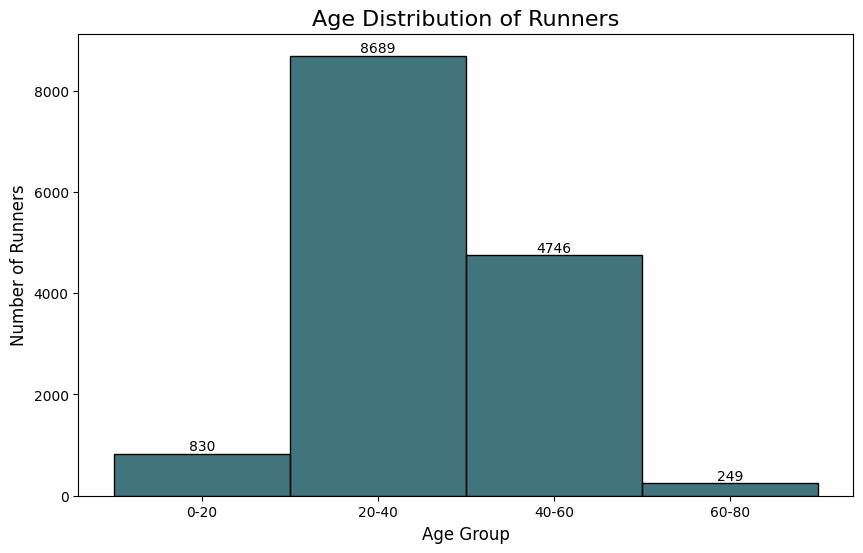

In [ ]:
# cheking the age distribution of runners

bins = [0, 20, 40, 60, 80]
# Create histogram using seaborn
plt.figure(figsize=(10, 6))
ax = sns.histplot(marathon['age'], bins=bins, kde=False, color='#034652' )

# Add titles and labels
plt.title('Age Distribution of Runners', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Runners', fontsize=12)

# Add count on top of each bar
for container in ax.containers:
    ax.bar_label(container)

# Set x-axis labels to reflect the bin ranges
ax.set_xticks(bins[:-1] + np.diff(bins)/2) # Position labels in the middle of the bins
ax.set_xticklabels([f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)])

plt.show()

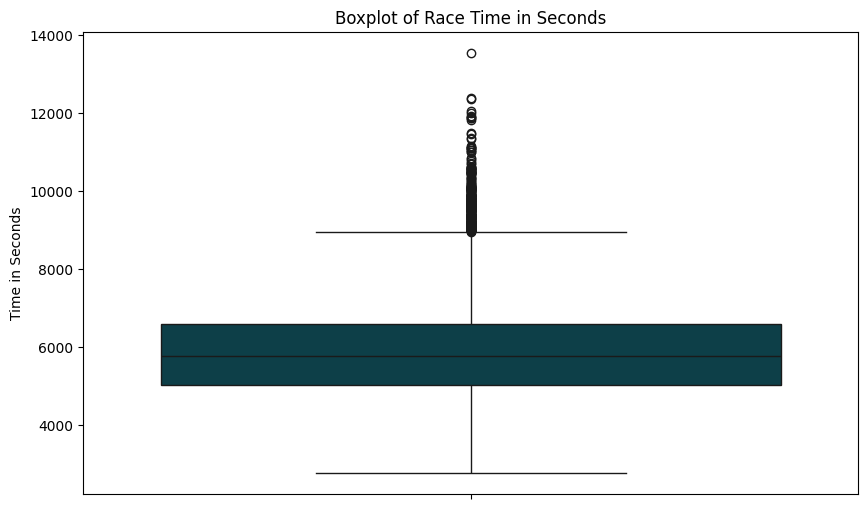

In [ ]:
# create a box plot of all the value in the time second

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(y=marathon['time_seconds'], color="#034652")
plt.title('Boxplot of Race Time in Seconds')
plt.ylabel('Time in Seconds')
plt.show()

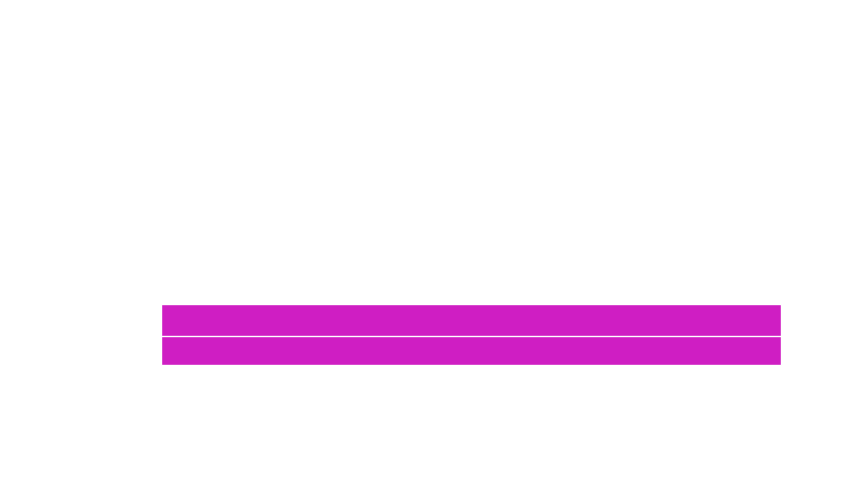

In [ ]:
# change the color on the box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y=marathon['time_seconds'], color="#ED00DC", boxprops=dict(edgecolor="white"), capprops=dict(color="white"), whiskerprops=dict(color="white"), medianprops=dict(color="white"), flierprops=dict(markerfacecolor='white', markeredgecolor="white"))

# Set spine colors
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')

# Set x-axis and y-axis label and tick colors
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

plt.ylabel('Time in Seconds')

# Set background color
plt.gcf().patch.set_alpha(0)
ax.patch.set_alpha(0)

plt.show()

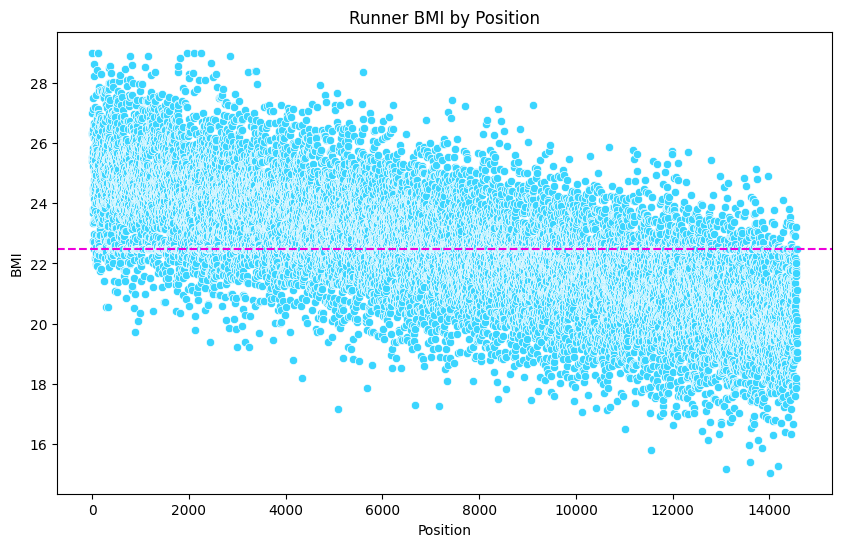

In [ ]:
# create a scatter plot of the runner's bmi by position

average_bmi = marathon["bmi"].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=marathon, x='position', y='bmi', color ="#3AD5FF")
plt.title('Runner BMI by Position')
plt.xlabel('Position')
plt.axhline(y=average_bmi, color='#ED00DC', linestyle='--', label=f'Average BMI: {average_bmi:.2f}')
plt.ylabel('BMI')
plt.show()

In [ ]:
# create the data bar chart average bmi by position bin

# Create position bins
bins = [0, 3000, 6000, 9000, 12000, 15000]
labels = ['1-3000', '3001-6000', '6001-9000', '9001-12000', '12001-15000']
marathon['position_bin'] = pd.cut(marathon['position'], bins=bins, labels=labels, right=True)

# Calculate the average BMI for each position bin
average_bmi_by_position_bin = marathon.groupby('position_bin')['bmi'].mean().reset_index()

# Print the data used for the bar chart
print("Data for Average BMI by Position Bin:")
average_bmi_by_position_bin

Data for Average BMI by Position Bin:


/tmp/ipython-input-2521838336.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bmi_by_position_bin = marathon.groupby('position_bin')['bmi'].mean().reset_index()


position_bin        bmi
0       1-3000  24.370527
1    3001-6000  23.438422
2    6001-9000  22.412551
3   9001-12000  21.449396
4  12001-15000  20.524197

/tmp/ipython-input-3374175480.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='position_bin', y='bmi', data=average_bmi_by_position_bin, palette='viridis')


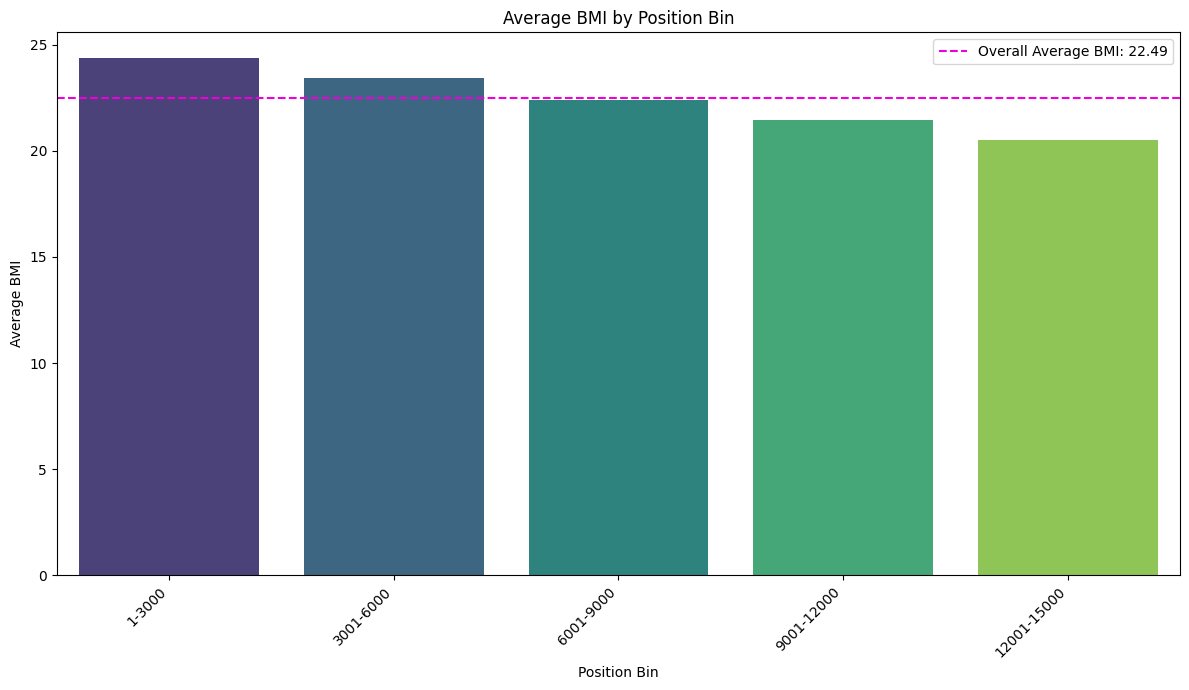

In [ ]:
# create the bar chart show the average BMI by position

# Calculate the average BMI
average_bmi = marathon["bmi"].mean()

# Plot the bar chart
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='position_bin', y='bmi', data=average_bmi_by_position_bin, palette='viridis')
plt.title('Average BMI by Position Bin')
plt.xlabel('Position Bin')
plt.ylabel('Average BMI')
plt.xticks(rotation=45, ha='right') # Rotate labels

# Add the average BMI line
plt.axhline(y=average_bmi, color='#ED00DC', linestyle='--', label=f'Overall Average BMI: {average_bmi:.2f}')
plt.legend()

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


/tmp/ipython-input-4234085517.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='shoe_size', data=gender_shoe_size, palette='viridis')


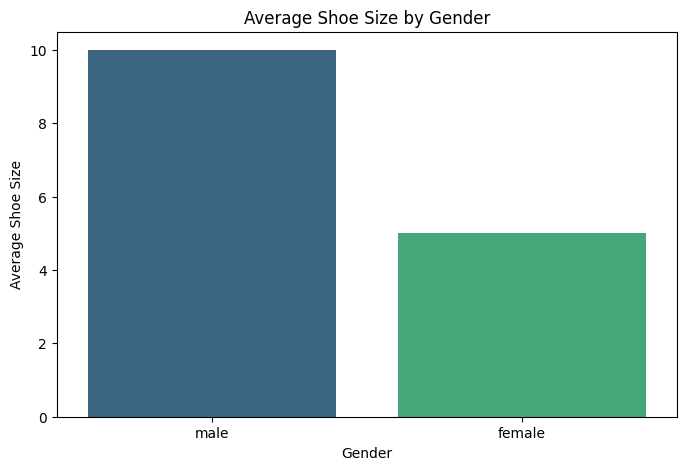

In [ ]:
# Calculate average shoe size by gender
gender_shoe_size = marathon.groupby('gender')['shoe_size'].mean().reset_index()

# Map gender back for plotting clarity
gender_shoe_size['gender'] = gender_shoe_size['gender'].map({0: 'male', 1: 'female'})

# Plot the result
plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='shoe_size', data=gender_shoe_size, palette='viridis')
plt.title('Average Shoe Size by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Shoe Size')
plt.show()

##A. Club Membership Insights

6377.29633359027


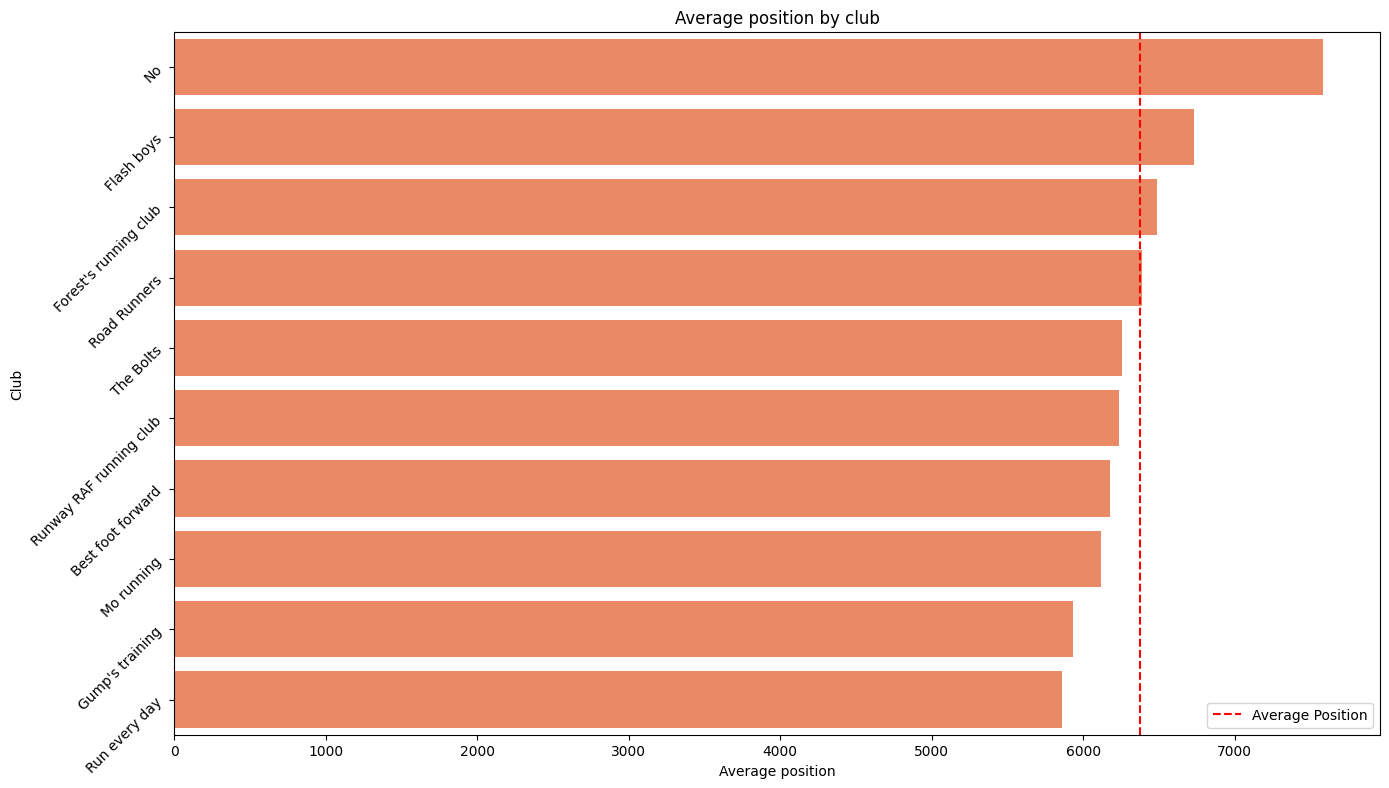

In [ ]:
# calculate mean position by club
club_position = marathon.groupby('club')['position'].agg(['mean', 'count'])
club_position = club_position.sort_values('mean', ascending=False)
print(club_position['mean'].mean())
# plot the result
plt.figure(figsize=(14, 8))
sns.barplot(y=club_position.index, x='mean', data=club_position, color = '#FF7F50')
plt.title('Average position by club')
plt.ylabel('Club')
plt.xlabel('Average position')
plt.yticks(rotation=45)
plt.axvline(x=club_position['mean'].mean(), color='r', linestyle='--', label='Average Position')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
club_position

mean  count
club                                       
No                       7581.404688  11347
Flash boys               6734.592705    329
Forest's running club    6484.803125    320
Road Runners             6389.045946    370
The Bolts                6253.819718    355
Runway RAF running club  6235.740331    362
Best foot forward        6176.596639    357
Mo running               6120.914773    352
Gump's training          5933.092896    366
Run every day            5862.952514    358

In [ ]:
# Group all of the runner that join then seperate 2 type of runner: 1 is join club ; 0 is no club
marathon['join_club'] = marathon['club'].apply(lambda x: 0 if x == 'No' else 1)

print("\nValue counts for 'join_club':")
print(marathon['join_club'].value_counts())


Value counts for 'join_club':
join_club
0    11347
1     3169
Name: count, dtype: int64


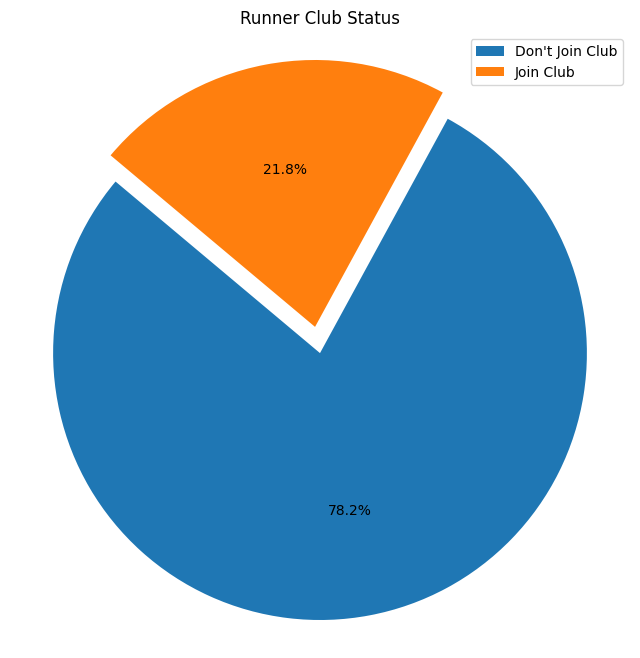

In [ ]:
# create a pie chart between runner join club and runner don't join
club_status_counts = marathon['join_club'].value_counts()

labels = ['Don\'t Join Club', 'Join Club']
sizes = [club_status_counts[0], club_status_counts[1]]

explode = (0, 0.1)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, autopct='%1.1f%%', startangle=140)

plt.title('Runner Club Status')
plt.legend(labels, loc="best")

plt.axis('equal')
plt.show()


only about 21.8% runner join a club and 7.89% runner have a trainer
but mostly the the participant that have a trainer is also join a club = > trainer is expensive even in a club but some of the top runners who want to take the prize will tend to have trainer more than other runners

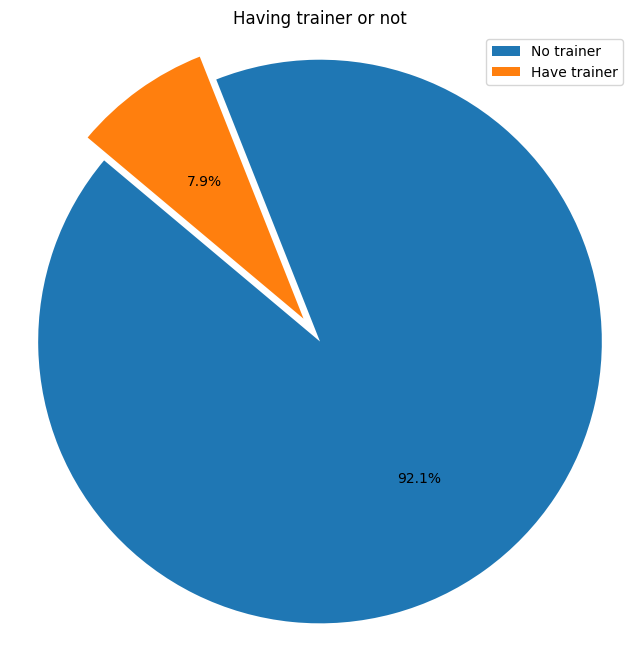

In [ ]:
# Create a pie chart showing the distribution of individuals have an traniner and no-trainer
has_trainer = marathon['has_trainer'].value_counts()

labels = ["No trainer", 'Have trainer']
sizes = [has_trainer[0], has_trainer[1]]

explode = (0, 0.1)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, autopct='%1.1f%%', startangle=140)

plt.title('Having trainer or not')
plt.legend(labels, loc="best")

plt.axis('equal')
plt.show()



In [ ]:
# Categorize runners based on club membership and trainer status
def categorize_runner(row):
    if row['join_club'] == 1 and row['has_trainer'] == 1:
        return 'Club and Trainer'
    elif row['join_club'] == 1 and row['has_trainer'] == 0:
        return 'Club only'
    elif row['join_club'] == 0 and row['has_trainer'] == 1:
        return 'Trainer only'
    else:
        return 'Neither Club nor Trainer'

marathon['runner_category'] = marathon.apply(categorize_runner, axis=1)

# Create a new DataFrame with the counts of each category
runner_category_counts = marathon['runner_category'].value_counts().reset_index()
runner_category_counts.columns = ['Category', 'Count']

# Calculate the total number of runners
total_runners = runner_category_counts['Count'].sum()

# Calculate the percentage for each category and add it as a new column
runner_category_counts['Percentage'] = (runner_category_counts['Count'] / total_runners) * 100


display(runner_category_counts)

Category  Count  Percentage
0  Neither Club nor Trainer  11334   78.079361
1                 Club only   2037   14.032791
2          Club and Trainer   1132    7.798292
3              Trainer only     13    0.089556

/tmp/ipython-input-777918628.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Average Position', data=avg_positions_df, palette='Oranges')


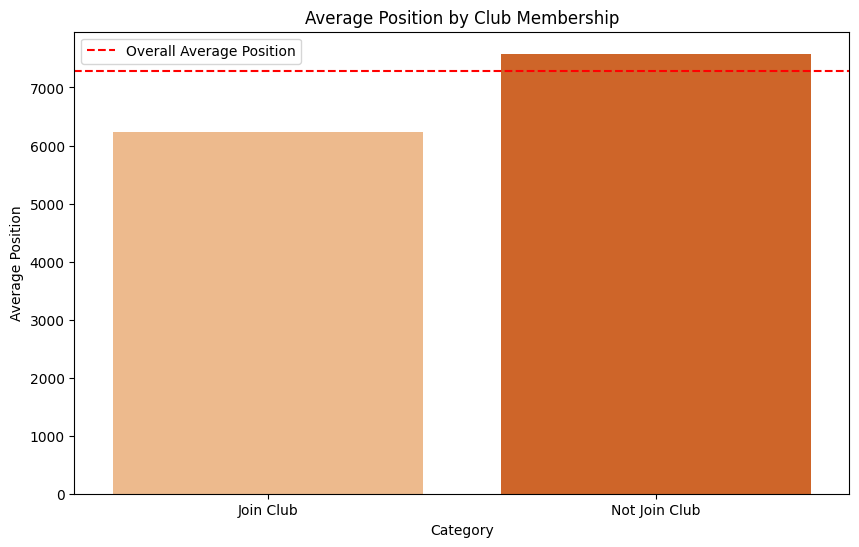

In [ ]:
# Calculate the average position for 'join club' and 'not join club'
avg_pos_join_club = marathon[marathon['join_club'] == 1]['position'].mean()
avg_pos_not_join_club = marathon[marathon['join_club'] == 0]['position'].mean()

# Create a DataFrame for plotting
avg_positions_df = pd.DataFrame({
    'Category': ['Join Club', 'Not Join Club'],
    'Average Position': [avg_pos_join_club, avg_pos_not_join_club]})

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Average Position', data=avg_positions_df, palette='Oranges')
plt.axhline(marathon['position'].mean(), color='r', linestyle='--', label='Overall Average Position')

plt.title('Average Position by Club Membership')
plt.ylabel('Average Position')
plt.xlabel('Category')
plt.legend()
plt.show()

In [ ]:
# Print the data used for the bar chart
avg_positions_df

Category  Average Position
0      Join Club       6236.120227
1  Not Join Club       7581.404688

In [ ]:
marathon['position'].mean()

np.float64(7287.714521906862)

- Individuals who join a club exhibit a better average position (approximately 6,100) compared to those who do not join any club (exceeding 7,000) and the overall population (approximately 7,000).

/tmp/ipython-input-3506193881.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='join_club', y='trained_im', data=avg_trained_im_by_club, palette='viridis')


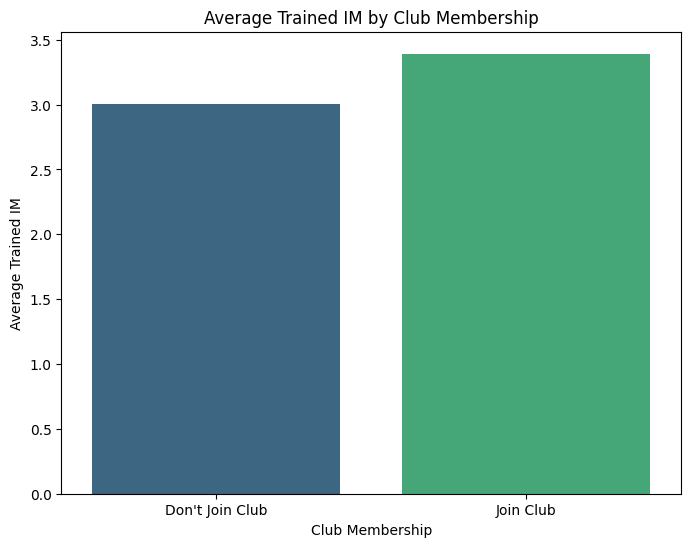

In [ ]:
# Calculate the average trained_im for runners who joined a club and those who didn't
avg_trained_im_by_club = marathon.groupby('join_club')['trained_im'].mean().reset_index()

# Map the 'join_club' values to descriptive labels for the plot
avg_trained_im_by_club['join_club'] = avg_trained_im_by_club['join_club'].map({0: 'Don\'t Join Club', 1: 'Join Club'})

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='join_club', y='trained_im', data=avg_trained_im_by_club, palette='viridis')
plt.title('Average Trained IM by Club Membership')
plt.xlabel('Club Membership')
plt.ylabel('Average Trained IM')
plt.show()

In [ ]:
avg_trained_im_by_club

join_club  trained_im
0  Don't Join Club    3.007395
1        Join Club    3.391916

/tmp/ipython-input-3453474315.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Average Position', data=avg_positions_filtered_df, palette='viridis')


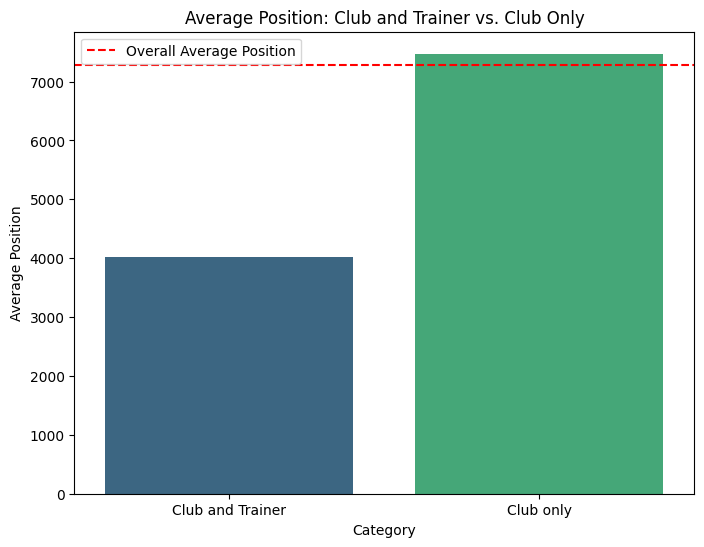

In [ ]:
# create a bar chart for average position by personal trainer in club membership
# Filter for runners who are "Club and Trainer" or "Club only"
club_and_trainer_df = marathon[marathon['runner_category'] == 'Club and Trainer']
club_only_df = marathon[marathon['runner_category'] == 'Club only']


# Calculate the average position for each group
avg_pos_club_and_trainer = club_and_trainer_df['position'].mean()
avg_pos_club_only = club_only_df['position'].mean()

# Create a DataFrame for plotting
avg_positions_filtered_df = pd.DataFrame({
    'Category': ['Club and Trainer', 'Club only'],
    'Average Position': [avg_pos_club_and_trainer, avg_pos_club_only]
})

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Average Position', data=avg_positions_filtered_df, palette='viridis')
plt.axhline(marathon['position'].mean(), color='r', linestyle='--', label='Overall Average Position')

plt.title('Average Position: Club and Trainer vs. Club Only')
plt.ylabel('Average Position')
plt.xlabel('Category')
plt.legend()
plt.show()

In [ ]:
avg_positions_filtered_df

Category  Average Position
0  Club and Trainer       4011.876325
1         Club only       7472.175258

- Racers who have a personal trainer tend to achieve better positions due to receiving enhanced training.

##B. Runner's Gender Insights

/tmp/ipython-input-4007159701.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='position', data=gender_position, palette='Oranges')


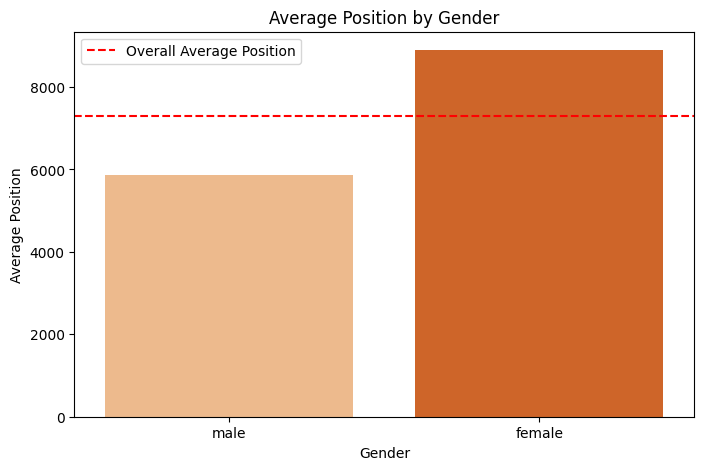

In [ ]:
# Calculate average position by gender
gender_position = marathon.groupby('gender')['position'].mean().reset_index()

# Map gender back for plotting clarity (optional, depends on preference)
gender_position['gender'] = gender_position['gender'].map({0: 'male', 1: 'female'})

# Plot the result
plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='position', data=gender_position, palette='Oranges')
plt.axhline(marathon['position'].mean(), color='r', linestyle='--', label='Overall Average Position')
plt.title('Average Position by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Position')
plt.legend()
plt.show()

In [ ]:
gender_position

gender     position
0    male  5874.051787
1  female  8895.360424

/tmp/ipython-input-2205769351.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_position_bin = marathon.groupby('position_bin')['gender'].value_counts(normalize=True).mul(100).reset_index(name='percentage')


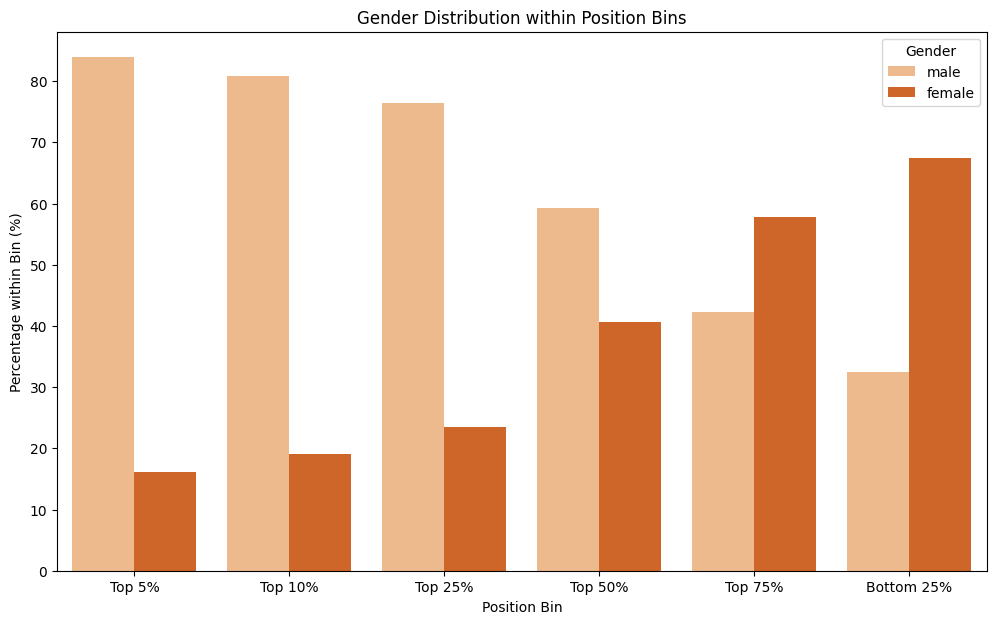

In [ ]:
# Gender distribution within Position Bins
# Bin the position into groups to analyze top performers
marathon['position_bin'] = pd.qcut(marathon['position'], q=[0, 0.05, 0.1, 0.25, 0.5, 0.75, 1], labels=['Top 5%', 'Top 10%', 'Top 25%', 'Top 50%', 'Top 75%', 'Bottom 25%'])

# Calculate the percentage of each gender within each position bin
gender_position_bin = marathon.groupby('position_bin')['gender'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

# Map gender back for plotting clarity
gender_position_bin['gender'] = gender_position_bin['gender'].map({0: 'male', 1: 'female'})

# Plot the stacked bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='position_bin', y='percentage', hue='gender', data=gender_position_bin, palette='Oranges')
plt.title('Gender Distribution within Position Bins')
plt.xlabel('Position Bin')
plt.ylabel('Percentage within Bin (%)')
plt.legend(title='Gender')
plt.show()


In [ ]:
gender_position_bin

position_bin  gender  percentage
0        Top 5%    male   83.884298
1        Top 5%  female   16.115702
2       Top 10%    male   80.853994
3       Top 10%  female   19.146006
4       Top 25%    male   76.481396
5       Top 25%  female   23.518604
6       Top 50%    male   59.300083
7       Top 50%  female   40.699917
8       Top 75%  female   57.784514
9       Top 75%    male   42.215486
10   Bottom 25%  female   67.511711
11   Bottom 25%    male   32.488289

- Males tend to achieve better results than females, attributable to the generally higher natural strength of males compared to females.

In [ ]:
# Define age bins
bins = [0, 20, 40, 60, 80]
labels = ['0-20', '20-40', '40-60', '60-80']
marathon['age_group'] = pd.cut(marathon['age'], bins=bins, labels=labels, right=False)

# Calculate the percentage of each age group within each gender
age_gender_percentage = marathon.groupby('gender')['age_group'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Display the dataframe
display(age_gender_percentage)

age_group      0-20      20-40      40-60     60-80
gender                                             
0          6.048439  54.694988  36.743945  2.512628
1          5.344523  65.753828  28.106596  0.795053

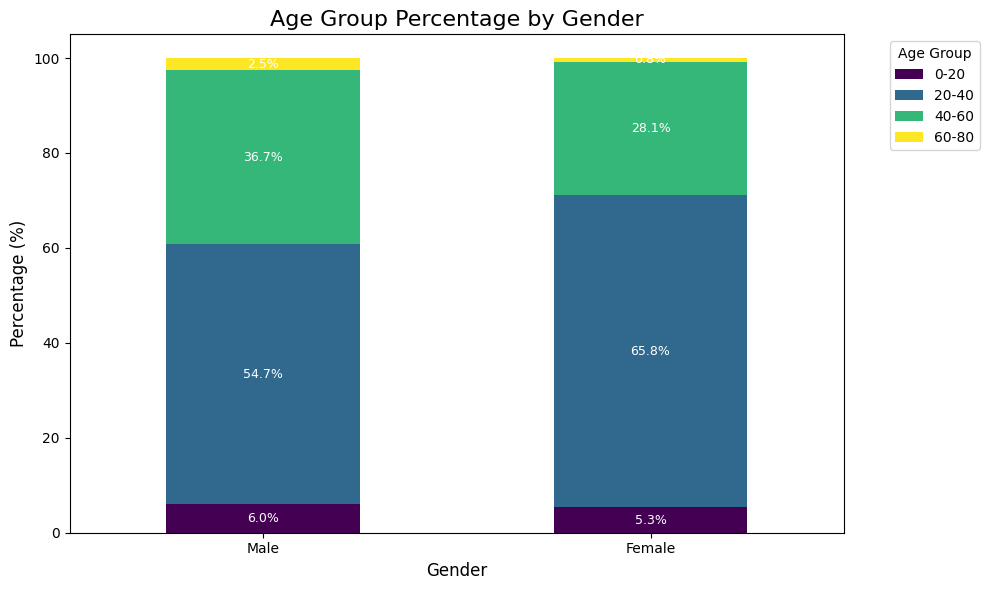

In [ ]:
# create a stack bar chart for % age group by gender

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

age_gender_percentage.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Add labels and title
ax.set_xlabel('Gender', fontsize=12) # Change x-axis label
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Age Group Percentage by Gender', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0) # Set custom x-axis labels

# Add percentage labels on top of each bar segment
for container in ax.containers:
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9, color='white')

# Add legend
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

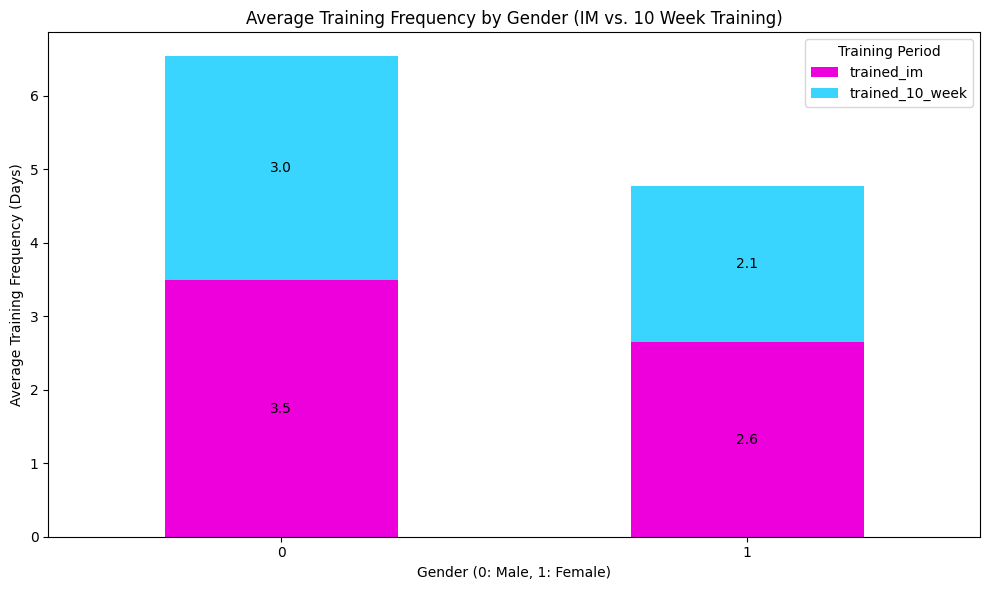

In [ ]:
#  create a stack bar chart with trained im, trained 10 week stack on each other and compare them with gender

# Group by gender and calculate the mean of trained_im and trained_10_week
training_by_gender = marathon.groupby('gender')[['trained_im', 'trained_10_week']].mean()

# Stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

training_by_gender.plot(kind='bar', stacked=True, ax=ax, color=['#ED00DC', '#3AD5FF'])

# Add labels and title
ax.set_xlabel('Gender (0: Male, 1: Female)')
ax.set_ylabel('Average Training Frequency (Days)')
ax.set_title('Average Training Frequency by Gender (IM vs. 10 Week Training)')
plt.xticks(rotation=0)

# Add values on top of the bars
for c in ax.containers:
    labels = [f'{v.get_height():.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# Add legend
plt.legend(title='Training Period')

plt.tight_layout()
plt.show()

##C. Training Insights

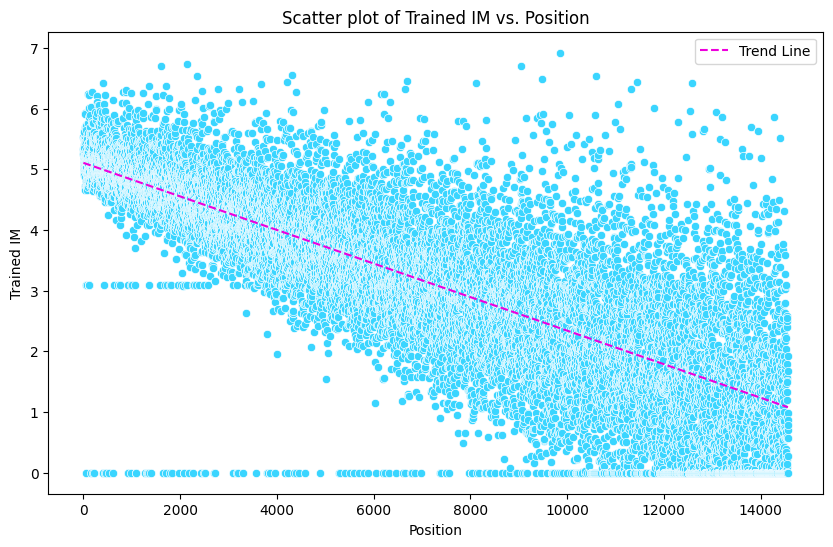

In [ ]:
#  create a scatter plot between train im and position with trend line

# Scatter plot with trend line for trained_im vs position
z_im_pos = np.polyfit(marathon['position'], marathon['trained_im'], 1)
p_im_pos = np.poly1d(z_im_pos)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=marathon, x='position', y='trained_im', color='#3AD5FF')

# Add the trend line
plt.plot(marathon['position'], p_im_pos(marathon['position']), color='#ED00DC', linestyle='--', label='Trend Line')

plt.title('Scatter plot of Trained IM vs. Position')
plt.xlabel('Position')
plt.ylabel('Trained IM')
plt.legend()
plt.show()

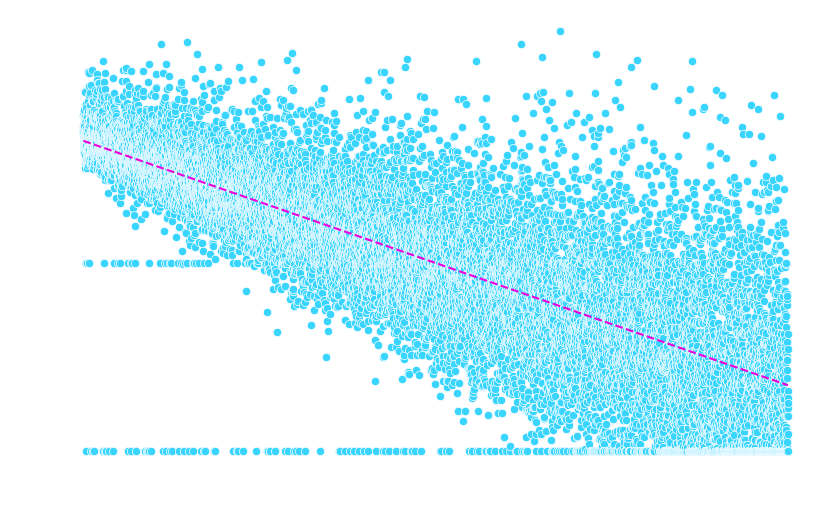

In [ ]:
# change the color for the scatter plot

# Scatter plot with trend line for trained_im vs position
z_im_pos = np.polyfit(marathon['position'], marathon['trained_im'], 1)
p_im_pos = np.poly1d(z_im_pos)

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=marathon, x='position', y='trained_im', color='#3AD5FF')

# Add the trend line
plt.plot(marathon['position'], p_im_pos(marathon['position']), color='#ED00DC', linestyle='--')

plt.xlabel('Position', color='white') # Change x-axis label color
plt.ylabel('Trained IM', color='white') # Change y-axis label color

# Set axis color and tick colors
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set background
fig = ax.get_figure()
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

plt.show()


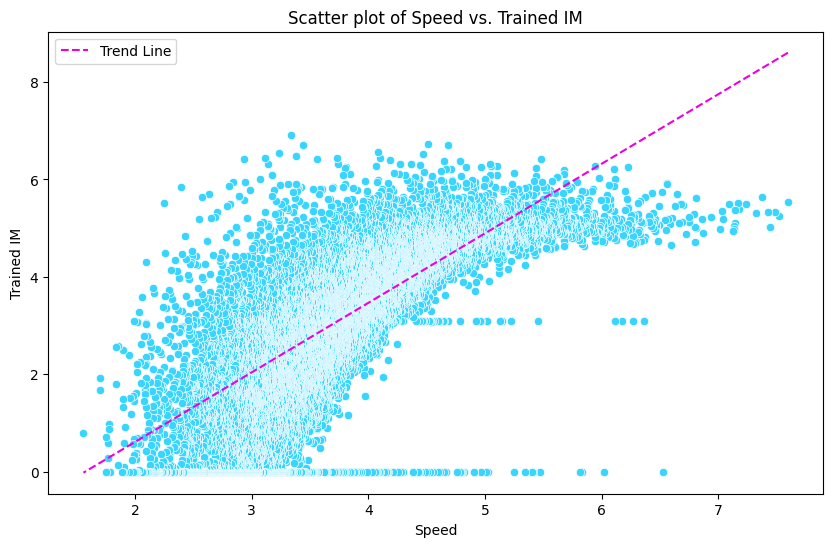

In [ ]:
# create a scatter plot speed and trained im

# Calculate the polynomial fit (degree 1 for a linear trend line)
z = np.polyfit(marathon['speed'], marathon['trained_im'], 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=marathon, x='speed', y='trained_im', color='#3AD5FF')

# Add the trend line
plt.plot(marathon['speed'], p(marathon['speed']), color='#ED00DC', linestyle='--', label='Trend Line')

plt.title('Scatter plot of Speed vs. Trained IM')
plt.xlabel('Speed')
plt.ylabel('Trained IM')
plt.legend()
plt.show()

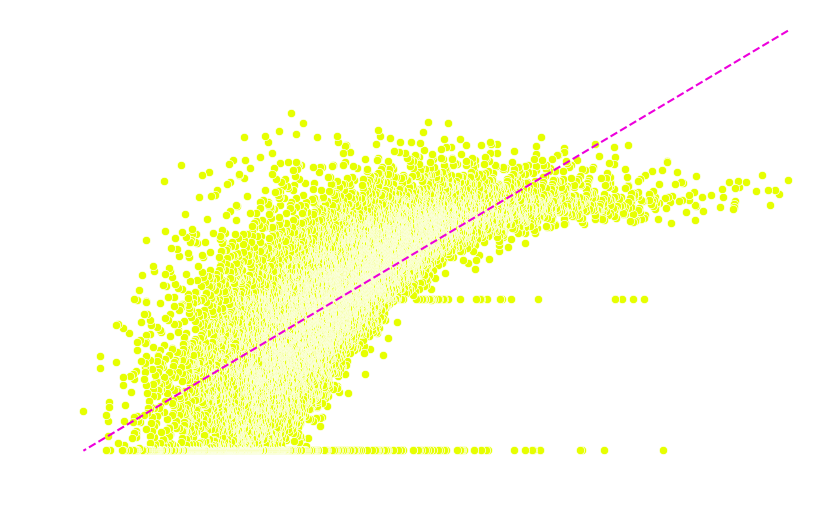

In [ ]:
# change the color for the scatter plot

# Scatter plot with trend line for trained_im vs position
z = np.polyfit(marathon['speed'], marathon['trained_im'], 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=marathon, x='speed', y='trained_im', color='#E6FF00')

plt.plot(marathon['speed'], p(marathon['speed']), color='#ED00DC', linestyle='--')

plt.xlabel('speed', color='white') # Change x-axis label color
plt.ylabel('Trained IM', color='white') # Change y-axis label color

# Set axis color to transparent and tick colors
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set background
fig = ax.get_figure()
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

plt.show()

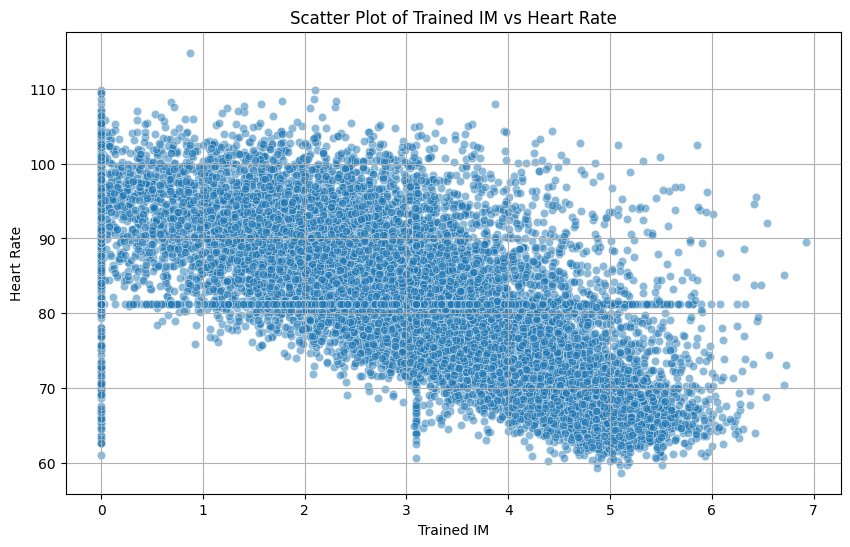

In [ ]:
# create a scatter plot illustrate trained IM with the heartrate

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trained_im', y='heart_rate', data=marathon, alpha=0.5)
plt.title('Scatter Plot of Trained IM vs Heart Rate')
plt.xlabel('Trained IM')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

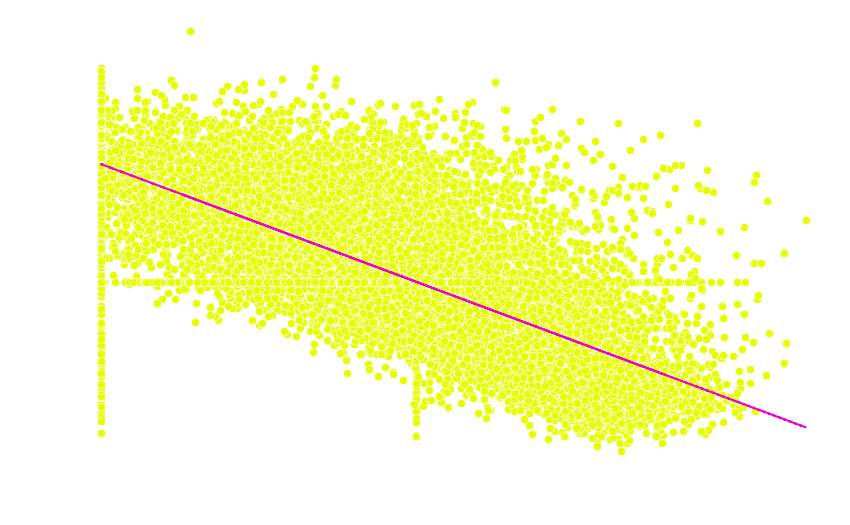

In [ ]:
# change the color for the scatterplot

# Calculate the polynomial fit for a linear trend line
z_im_heart = np.polyfit(marathon['trained_im'], marathon['heart_rate'], 1)
p_im_heart = np.poly1d(z_im_heart)

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='trained_im', y='heart_rate', data=marathon, color='#E6FF00')

# Add the trend line
plt.plot(marathon['trained_im'], p_im_heart(marathon['trained_im']), color='#ED00DC', linestyle='--')

plt.xlabel('Trained IM', color='white')
plt.ylabel('Heart Rate', color='white')


# Set axis color and tick colors
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set background
fig = ax.get_figure()
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

plt.show()

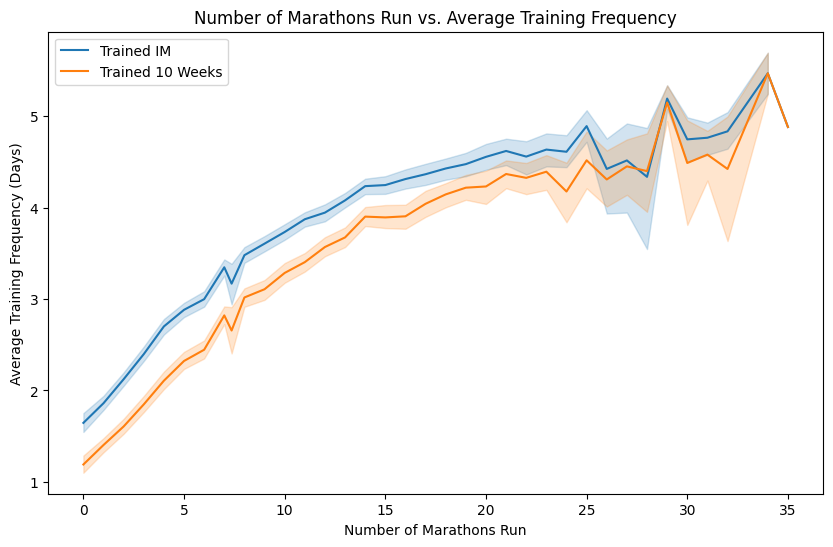

In [ ]:
# create a line chart illustrate the number of marathons run vs Average Training frequency

plt.figure(figsize=(10, 6))
sns.lineplot(data=marathon, x='n_marathons_run', y='trained_im', label='Trained IM')
sns.lineplot(data=marathon, x='n_marathons_run', y='trained_10_week', label='Trained 10 Weeks')
plt.title('Number of Marathons Run vs. Average Training Frequency')
plt.xlabel('Number of Marathons Run')
plt.ylabel('Average Training Frequency (Days)')
plt.legend()
plt.show()

In [ ]:
# the data of the line chart "Number of Marathons Run vs. Average Training Frequency"

# Group by 'n_marathons_run' and calculate the mean of 'trained_im' and 'trained_10_week'
training_by_n_marathons = marathon.groupby('n_marathons_run')[['trained_im', 'trained_10_week']].mean().reset_index()

training_by_n_marathons

n_marathons_run  trained_im  trained_10_week
0          0.000000    1.644782         1.189559
1          1.000000    1.859810         1.402902
2          2.000000    2.122276         1.605589
3          3.000000    2.396789         1.846982
4          4.000000    2.699844         2.106251
5          5.000000    2.881426         2.321953
6          6.000000    2.997962         2.444860
7          7.000000    3.346561         2.820477
8          7.363131    3.167705         2.655054
9          8.000000    3.478954         3.016569
10         9.000000    3.605238         3.106597
11        10.000000    3.732457         3.284837
12        11.000000    3.872081         3.402849
13        12.000000    3.944503         3.568320
14        13.000000    4.078337         3.673272
15        14.000000    4.234055         3.900816
16        15.000000    4.245834         3.892119
17        16.000000    4.311845         3.904203
18        17.000000    4.364551         4.041113
19        18.000000    4.427285         4.143895
20        19.000000    4.474843         4.217293
21        20.000000    4.554452         4.230491
22        21.000000    4.618859         4.366928
23        22.000000    4.557353         4.324790
24        23.000000    4.634120         4.392062
25        24.000000    4.610116         4.175247
26        25.000000    4.890646         4.516658
27        26.000000    4.422486         4.307219
28        27.000000    4.515354         4.450355
29        28.000000    4.335879         4.398519
30        29.000000    5.191999         5.148417
31        30.000000    4.745679         4.487266
32        31.000000    4.763564         4.578809
33        32.000000    4.833571         4.421976
34        34.000000    5.468093         5.468093
35        35.000000    4.880774         4.880774

/tmp/ipython-input-3830410051.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_trained_im_by_age = marathon.groupby('age_group')['trained_im'].mean().reset_index()
/tmp/ipython-input-3830410051.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='trained_im', data=average_trained_im_by_age, palette='viridis')


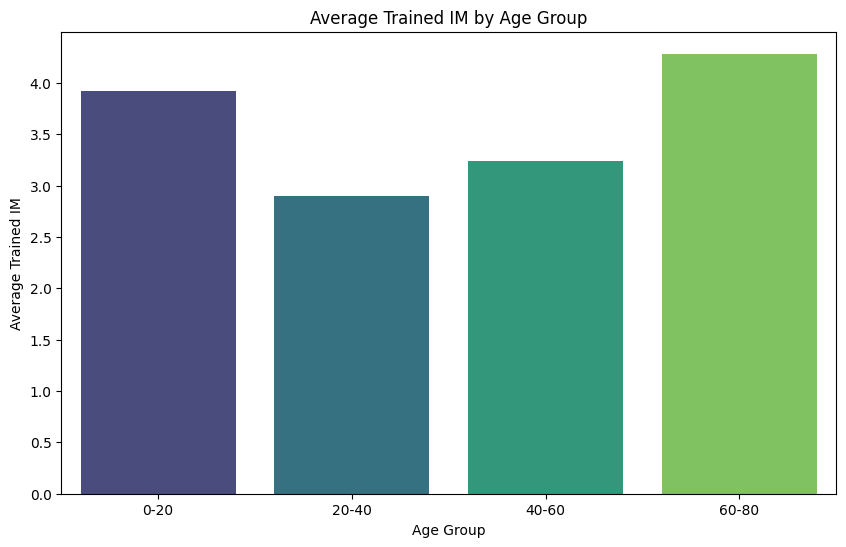

In [ ]:
# Calculate the average trained_im for each age group
bins = [0, 20, 40, 60, 80]
labels = ['0-20', '20-40', '40-60', '60-80']
marathon['age_group'] = pd.cut(marathon['age'], bins=bins, labels=labels, right=False)
average_trained_im_by_age = marathon.groupby('age_group')['trained_im'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='trained_im', data=average_trained_im_by_age, palette='viridis')
plt.title('Average Trained IM by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Trained IM')
plt.show()

In [ ]:
average_trained_im_by_age

age_group  trained_im
0      0-20    3.925223
1     20-40    2.896319
2     40-60    3.239421
3     60-80    4.284480

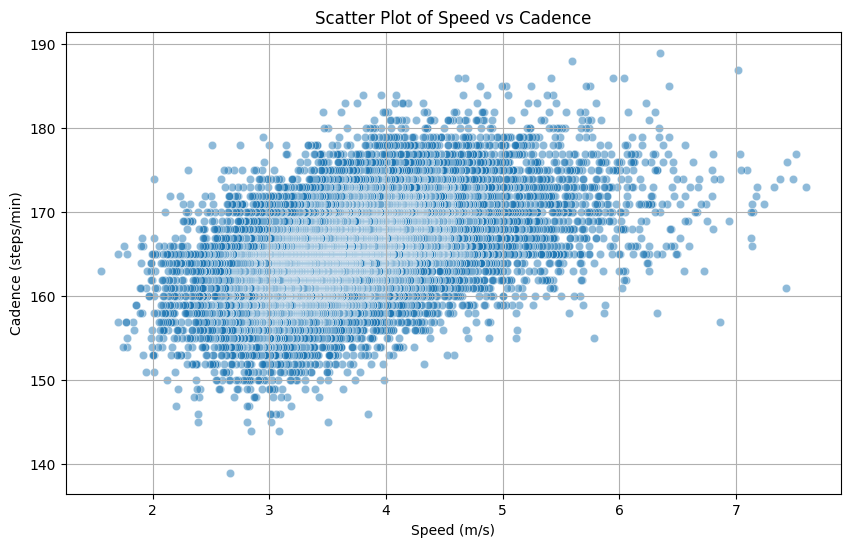

In [ ]:
# prompt: create a scatter plot between speed and candence

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='speed', y='cadence', data=marathon, alpha=0.5)
plt.title('Scatter Plot of Speed vs Cadence')
plt.xlabel('Speed (m/s)')
plt.ylabel('Cadence (steps/min)')
plt.grid(True)
plt.show()

/tmp/ipython-input-3435251440.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='speed_bin', y='cadence', data=average_cadence_by_speed_bin, palette='viridis')


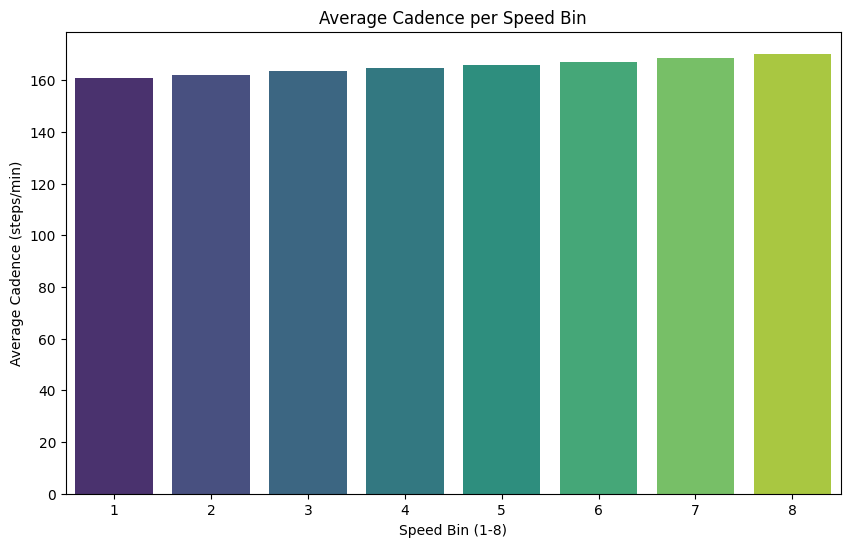

In [ ]:
#  create the bar chart illustrate the average cadence on each speed bin

# Create speed bins (8 bins from 1 to 8)
marathon['speed_bin'] = pd.qcut(marathon['speed'], q=8, labels=False) + 1

# Calculate the average cadence for each speed bin
average_cadence_by_speed_bin = marathon.groupby('speed_bin')['cadence'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='speed_bin', y='cadence', data=average_cadence_by_speed_bin, palette='viridis')
plt.title('Average Cadence per Speed Bin')
plt.xlabel('Speed Bin (1-8)')
plt.ylabel('Average Cadence (steps/min)')
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-3936178605.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='trained_im_bin', y='bmi', data=marathon, palette='viridis')


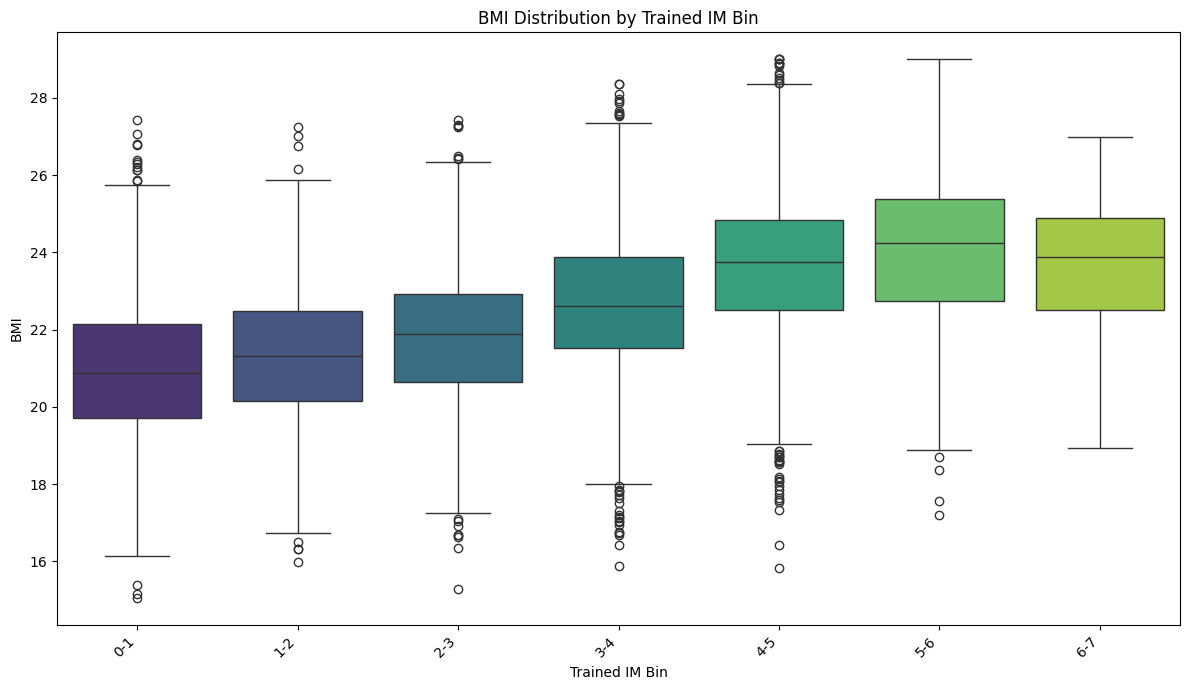

In [ ]:
# create a box plot to illustrate the bmi in the trained im bin here

# Define bins and labels for trained_im (0-1, 1-2, ..., 6-7)
bins = [0, 1, 2, 3, 4, 5, 6, 7]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7']

# Create the 'trained_im_bin' column
marathon['trained_im_bin'] = pd.cut(marathon['trained_im'], bins=bins, labels=labels, right=False, include_lowest=True)

# Create the box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='trained_im_bin', y='bmi', data=marathon, palette='viridis')
plt.title('BMI Distribution by Trained IM Bin')
plt.xlabel('Trained IM Bin')
plt.ylabel('BMI')
plt.xticks(rotation=45, ha='right') #
plt.tight_layout()
plt.show()


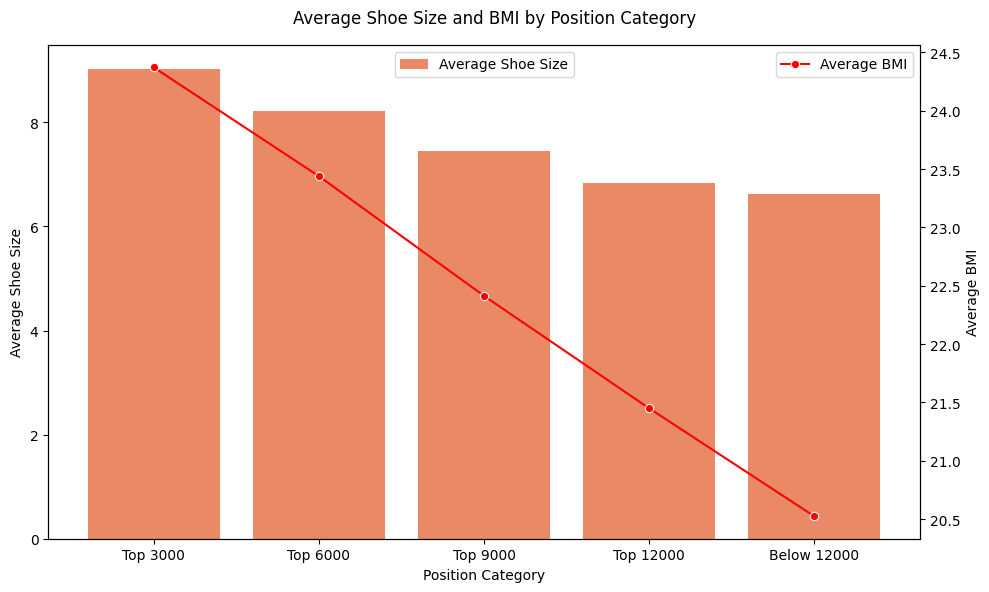

In [ ]:
# Function to categorize position into bins
def position_bin_category(position):
    if 0 <= position <= 3000:
        return 'Top 3000'
    elif position <= 6000:
        return 'Top 6000'
    elif position <= 9000:
        return 'Top 9000'
    elif position <= 12000:
        return 'Top 12000'
    else:
        return 'Below 12000'

marathon['position_category'] = marathon['position'].apply(position_bin_category)

# Calculate the average shoe size and average BMI for each position bin category
grouped_data = marathon.groupby('position_category').agg(
    avg_shoe_size=('shoe_size', 'mean'),
    avg_bmi=('bmi', 'mean')).reset_index()

# Define the order of position categories for plotting
position_order = ['Top 3000', 'Top 6000', 'Top 9000', 'Top 12000', 'Below 12000']
grouped_data['position_category'] = pd.Categorical(grouped_data['position_category'], categories=position_order, ordered=True)
grouped_data = grouped_data.sort_values('position_category')

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x='position_category', y='avg_shoe_size', data=grouped_data, ax=ax1, color="#FF7F50", label='Average Shoe Size')
ax1.set_xlabel('Position Category')
ax1.set_ylabel('Average Shoe Size')

ax2 = ax1.twinx()
sns.lineplot(x='position_category', y='avg_bmi', data=grouped_data, ax=ax2, color='red', marker='o', label='Average BMI')
ax2.set_ylabel('Average BMI')
ax2.tick_params(axis='y')

fig.suptitle('Average Shoe Size and BMI by Position Category')
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


Male mostly have more advantage then women due to their physique (height and endurance ) prove by the shoe size where most of the top ranking have a 9 size ( mostly dominate by men and some women) and low ranking have almost 6.5 size (mostly by women)

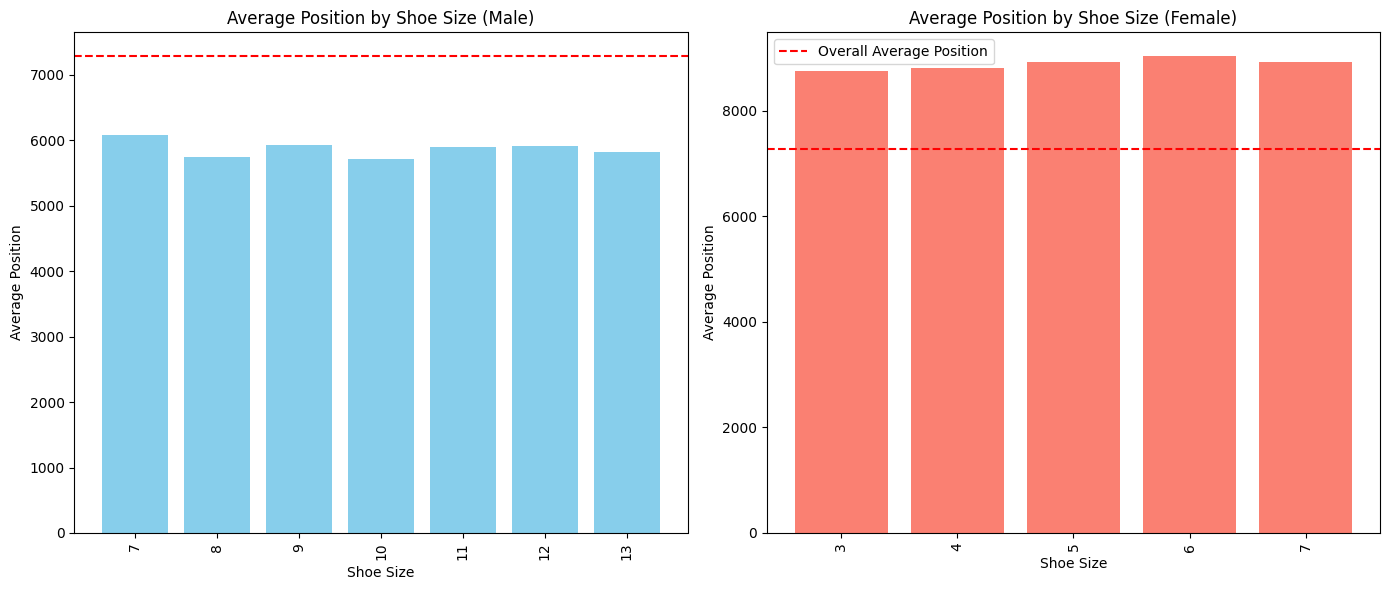

In [ ]:
# Histogram showing the average postion by shoes size and gender
shoe_size_gender_position = marathon.groupby(['shoe_size', 'gender'])['position'].mean().reset_index()

shoe_size_gender_position['gender'] = shoe_size_gender_position['gender'].map({0: 'male', 1: 'female'})

male_data = shoe_size_gender_position[shoe_size_gender_position['gender'] == 'male']
female_data = shoe_size_gender_position[shoe_size_gender_position['gender'] == 'female']

# Create the first histogram for males
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.bar(male_data['shoe_size'], male_data['position'], color='skyblue')
plt.axhline(marathon['position'].mean(), color='r', linestyle='--', label='Overall Average Position')
plt.xlabel('Shoe Size')
plt.ylabel('Average Position')
plt.title('Average Position by Shoe Size (Male)')
plt.xticks(rotation=90)

# Create the second histogram for females
plt.subplot(1, 2, 2)
plt.bar(female_data['shoe_size'], female_data['position'], color='salmon')
plt.axhline(marathon['position'].mean(), color='r', linestyle='--', label='Overall Average Position')
plt.xlabel('Shoe Size')
plt.ylabel('Average Position')
plt.title('Average Position by Shoe Size (Female)')
plt.xticks(rotation=90)

plt.legend()
plt.tight_layout()



Upon further investigation, the average position across each shoe size is approximately 6,000, indicating that while having a larger foot size may offer some advantages, a men's shoe size of 13 does not demonstrate a significant difference compared to the mean position associated with a size 7.

/tmp/ipython-input-3512638304.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bib_colour', y='position', data=bib_colour_position, palette='Oranges')


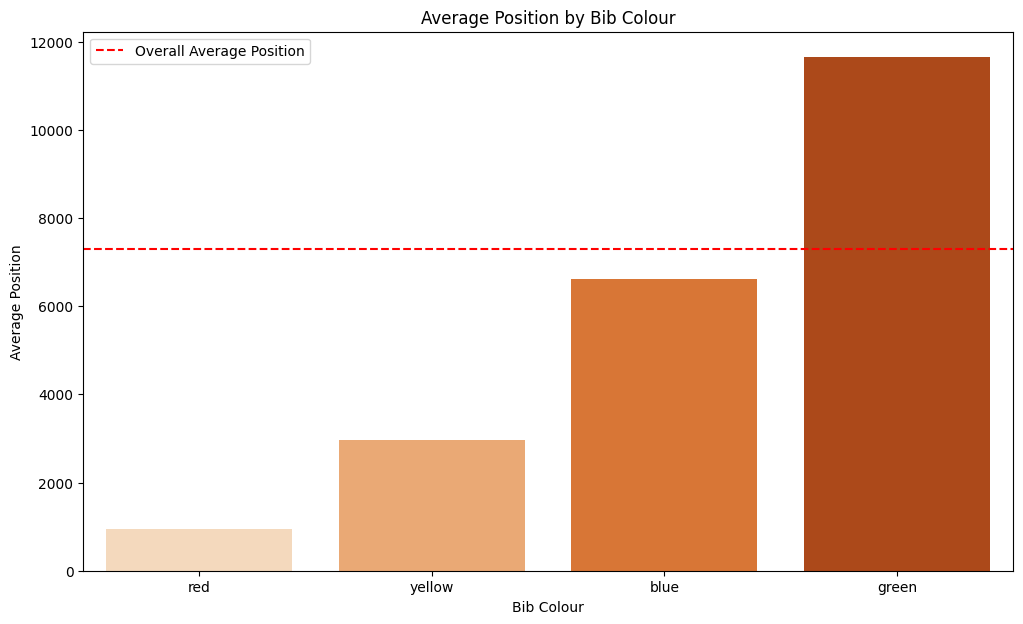

In [ ]:
# Calculate average position by bib colour
bib_colour_position = marathon.groupby('bib_colour')['position'].mean().reset_index()

# Sort for better visualization
bib_colour_position = bib_colour_position.sort_values('position', ascending=True)

# Create the histogram (bar plot)
plt.figure(figsize=(12, 7))
sns.barplot(x='bib_colour', y='position', data=bib_colour_position, palette='Oranges')
plt.axhline(marathon['position'].mean(), color='r', linestyle='--', label='Overall Average Position')
plt.title('Average Position by Bib Colour')
plt.xlabel('Bib Colour')
plt.ylabel('Average Position')
plt.legend()
plt.show()

The majority of racers with a red bib color are positioned within the top 1,500; however, no available information indicates that individuals wearing a red bib color are required to possess specific experience or qualifications. Consequently, there is a significant possibility that race organizers assign bib colors randomly, which may impact the accuracy of the model due to excessive uncertainty.

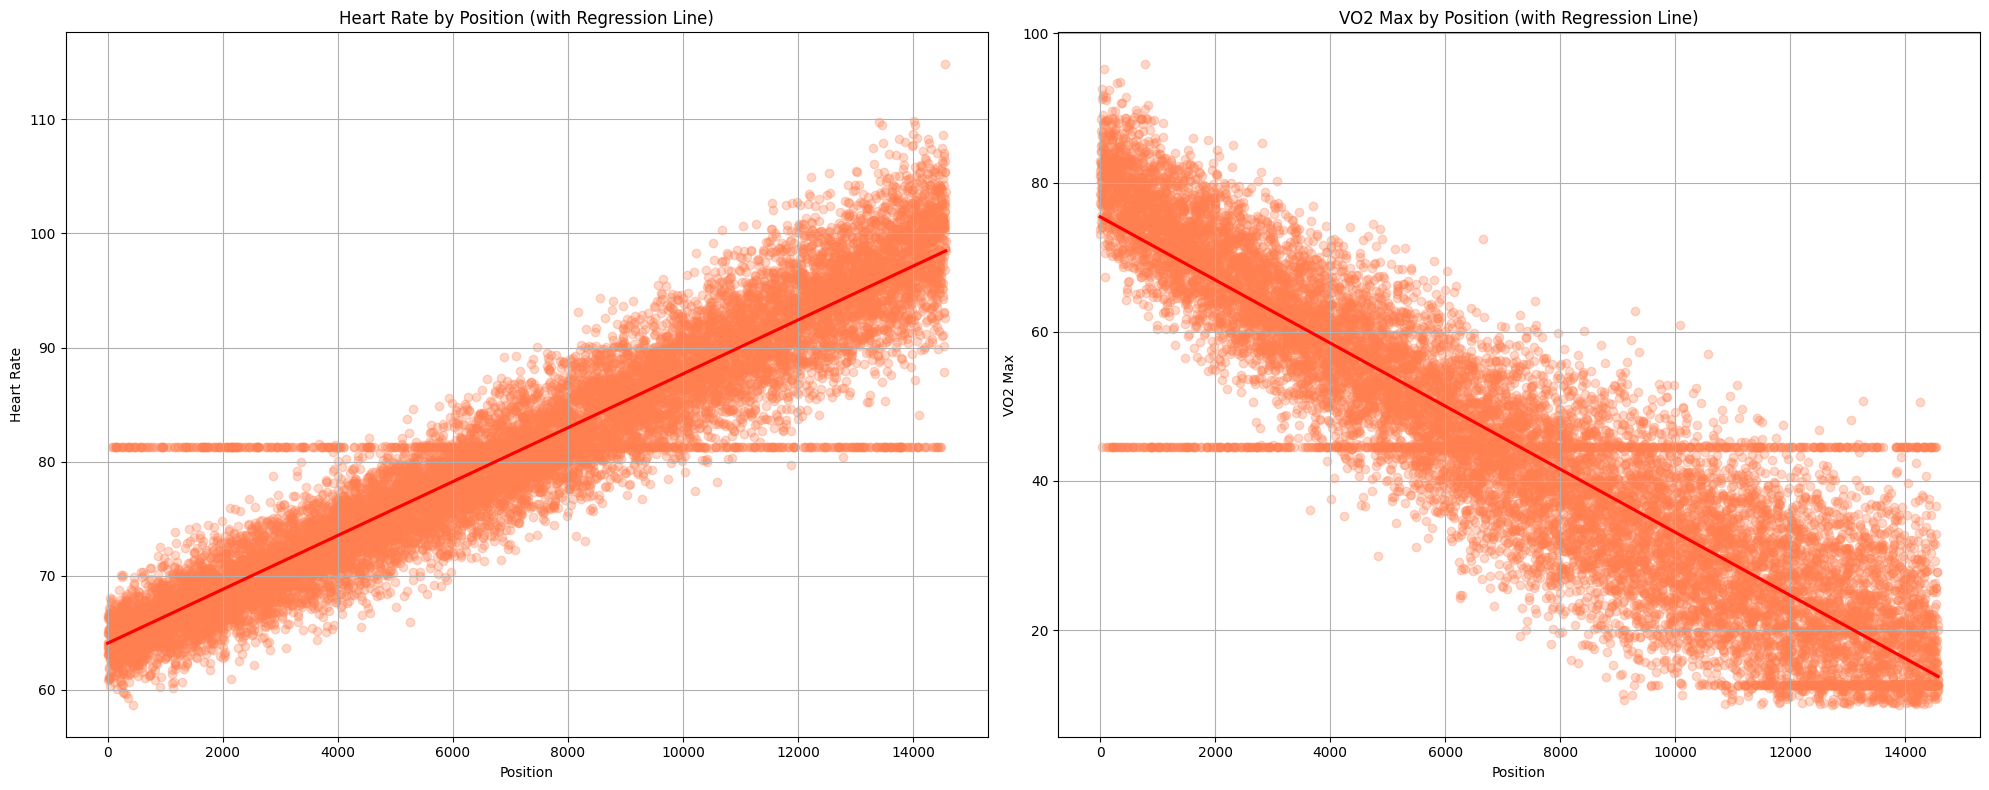

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# --- Scatter plot 1: Heart Rate by Position Bins with Regression Line ---
sns.regplot(x='position', y='heart_rate', data=marathon, ax=axes[0], scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, color = "#FF7F50")
axes[0].set_title('Heart Rate by Position (with Regression Line)')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Heart Rate')
axes[0].grid(True)

# --- Scatter plot 2: VO2 Max by Position Bins with Regression Line ---
sns.regplot(x='position', y='VO2_max', data=marathon, ax=axes[1], scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, color = "#FF7F50")
axes[1].set_title('VO2 Max by Position (with Regression Line)')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('VO2 Max')
axes[1].grid(True)

plt.tight_layout()
plt.show()

Heart rate and VO2 have some relationship with position as
fast runner tend to keep their heart rate low to maintain the running level but stil can utilize their VO2 max to keep their pace fast


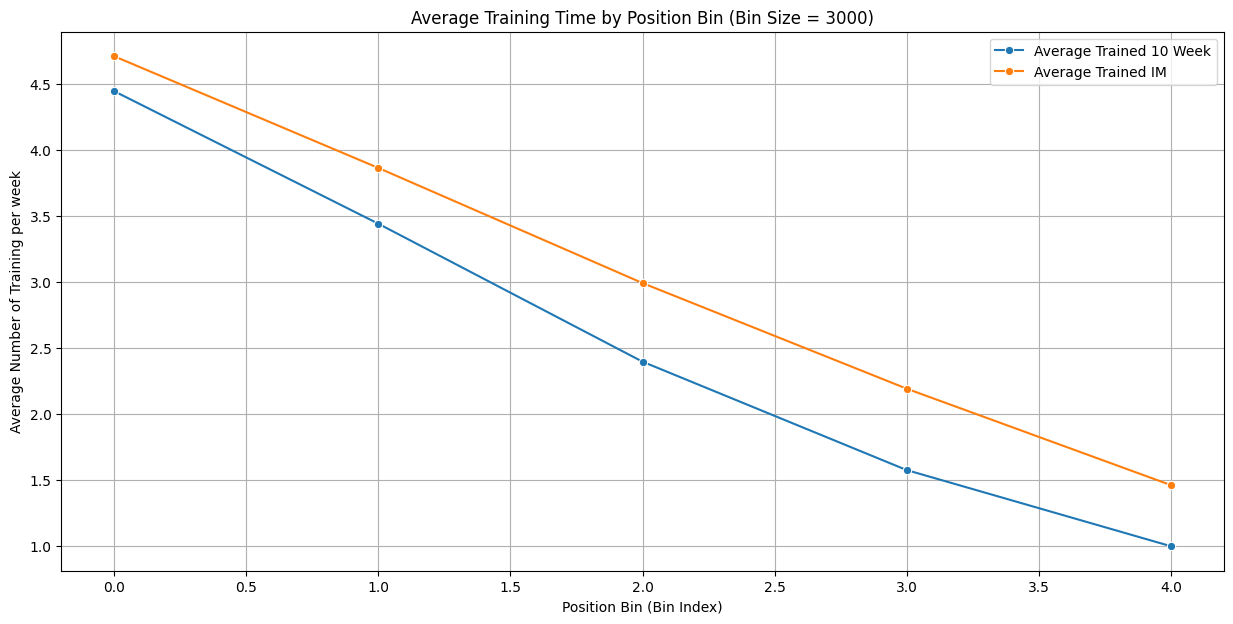

In [ ]:
# create an line chart show the average train 10 week and the average train im by position bins

# Define bin size for position
bin_size = 3000
# Create position bins with numerical labels
marathon['position_bin_numeric'] = pd.cut(marathon['position'], bins=range(0, marathon['position'].max() + bin_size, bin_size), right=False, labels=False)

# Calculate average trained_10_week and trained_im for each position bin
avg_training_by_position_bin = marathon.groupby('position_bin_numeric').agg(
    avg_trained_10_week=('trained_10_week', 'mean'),
    avg_trained_im=('trained_im', 'mean')
).reset_index()

# Create a figure and axes for the line plot
plt.figure(figsize=(15, 7))

# Plot the average trained_10_week using the new numerical column
sns.lineplot(x='position_bin_numeric', y='avg_trained_10_week', data=avg_training_by_position_bin, marker='o', label='Average Trained 10 Week')

# Plot the average trained_im using the new numerical column
sns.lineplot(x='position_bin_numeric', y='avg_trained_im', data=avg_training_by_position_bin, marker='o', label='Average Trained IM')

plt.title('Average Training Time by Position Bin (Bin Size = {})'.format(bin_size))
plt.xlabel('Position Bin (Bin Index)') # Update label to reflect what the x-axis represents
plt.ylabel('Average Number of Training per week')
plt.grid(True)
plt.legend()
plt.show()

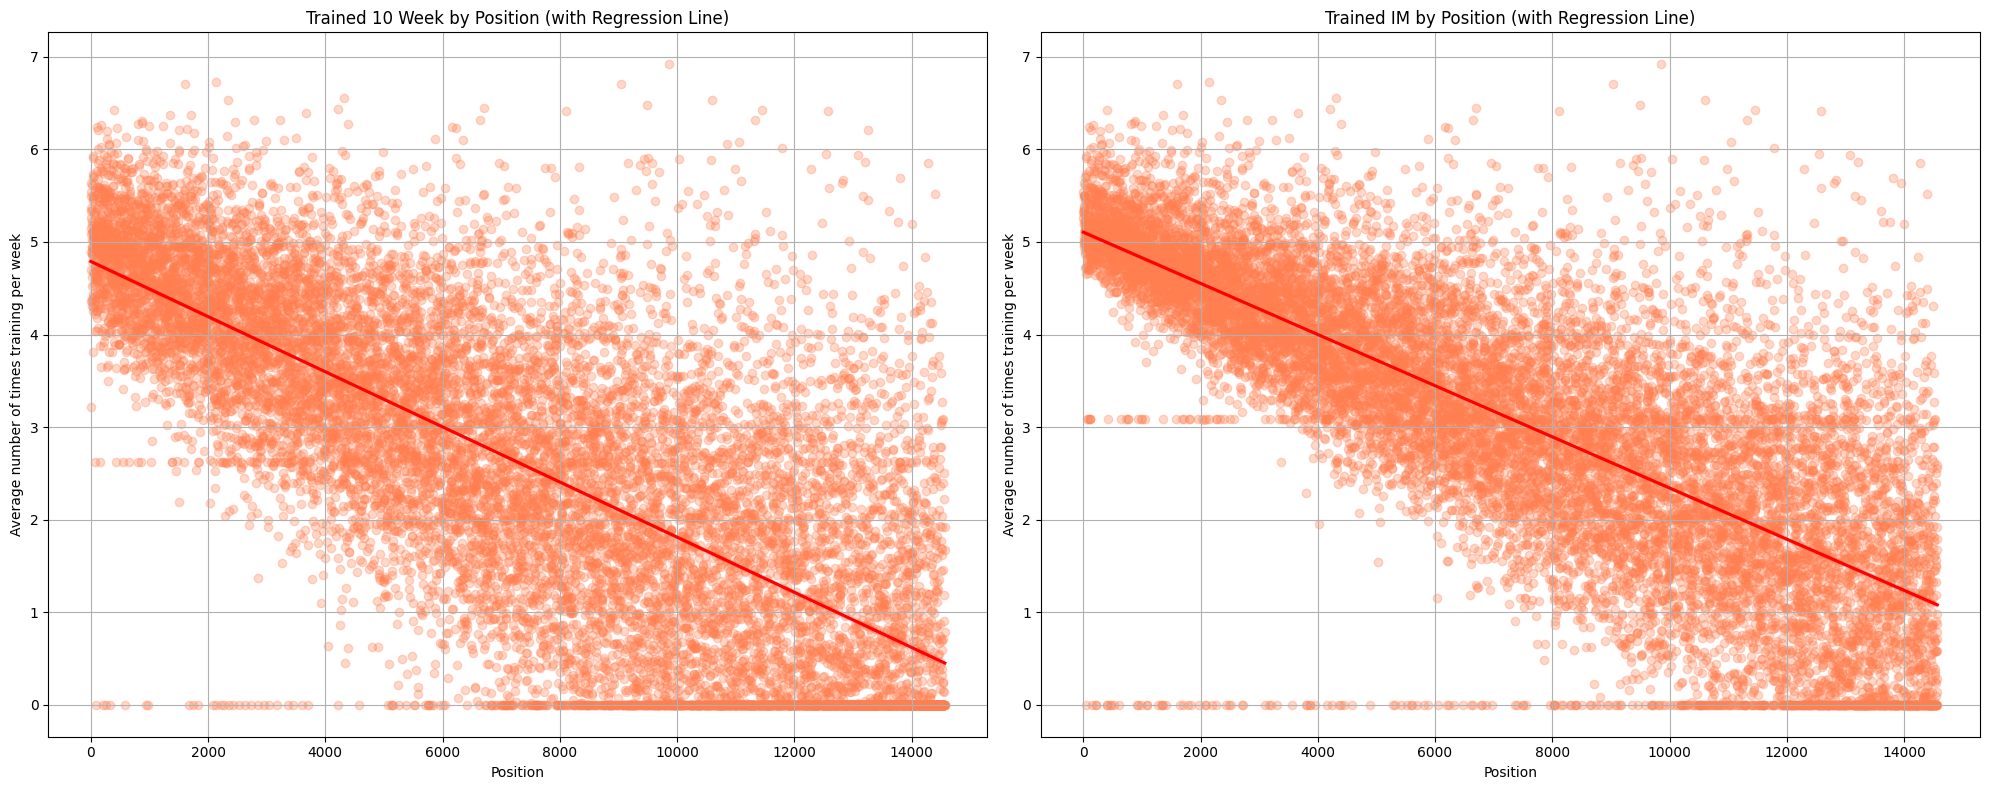

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# --- Scatter plot 1: trained_10_week by Position with Regression Line ---
sns.regplot(x='position', y='trained_10_week', data=marathon, ax=axes[0], scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, color = "#FF7F50")
axes[0].set_title('Trained 10 Week by Position (with Regression Line)')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Average number of times training per week')
axes[0].grid(True)

# --- Scatter plot 2: trained_im by Position with Regression Line ---
sns.regplot(x='position', y='trained_im', data=marathon, ax=axes[1], scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, color = "#FF7F50")
axes[1].set_title('Trained IM by Position (with Regression Line)')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Average number of times training per week')
axes[1].grid(True)

plt.tight_layout()
plt.show()


- suppose the train im is the average number of training time per week in less than 10 weeks so when the marathon coming closer people tend to excersise more than more 10 week
- the high performance mostly train more than 4.5 time a week ( about 4 -5 days per week) so the muscle will have more endurance when working in a long period of time, able to catch up with their heart rate and V02 max when running
- low performance less then 1 time per week or mayby 1 per 2 week ( 10 weeks ago) and 1 time per week in 10 week


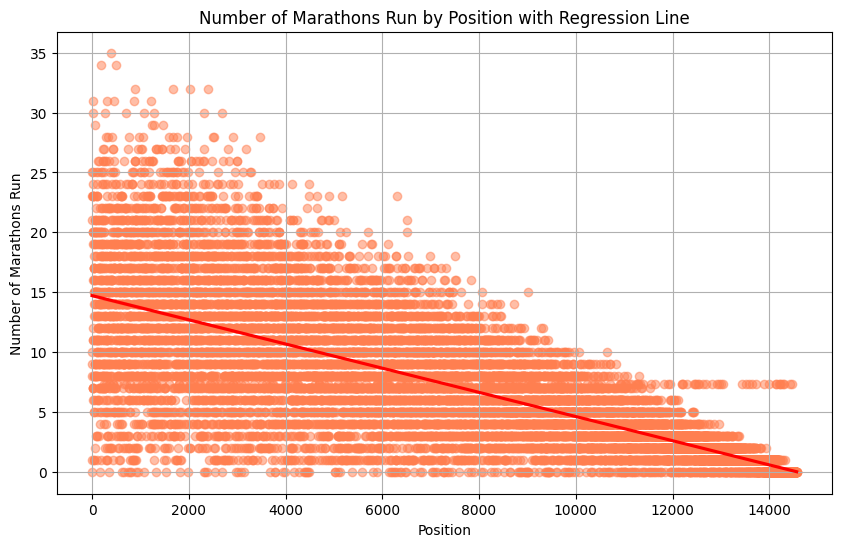

In [ ]:
#  include a red regression line for the above scatterplot without changing anything (n_marathon_run)

plt.figure(figsize=(10, 6))
sns.regplot(x='position', y='n_marathons_run', data=marathon, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, color = "#FF7F50")
plt.title('Number of Marathons Run by Position with Regression Line')
plt.xlabel('Position')
plt.ylabel('Number of Marathons Run')
plt.grid(True)
plt.show()

                 position    gender  trained_10_week  trained_im  has_trainer  \
position         1.000000  0.358569        -0.740194   -0.771192    -0.229207   
gender           0.358569  1.000000        -0.270249   -0.279006    -0.038283   
trained_10_week -0.740194 -0.270249         1.000000    0.852433     0.222357   
trained_im      -0.771192 -0.279006         0.852433    1.000000     0.224565   
has_trainer     -0.229207 -0.038283         0.222357    0.224565     1.000000   
cadence         -0.514158 -0.175710         0.383920    0.402845     0.273834   
age             -0.058863 -0.101774         0.048050    0.049023     0.001149   
bmi             -0.674275 -0.244154         0.498624    0.521142     0.156341   
n_marathons_run -0.731426 -0.265867         0.539079    0.561070     0.164197   
VO2_max         -0.909200 -0.328380         0.681896    0.702873     0.221355   
heart_rate       0.939496  0.337523        -0.696084   -0.724875    -0.213793   
shoe_size       -0.292615 -0

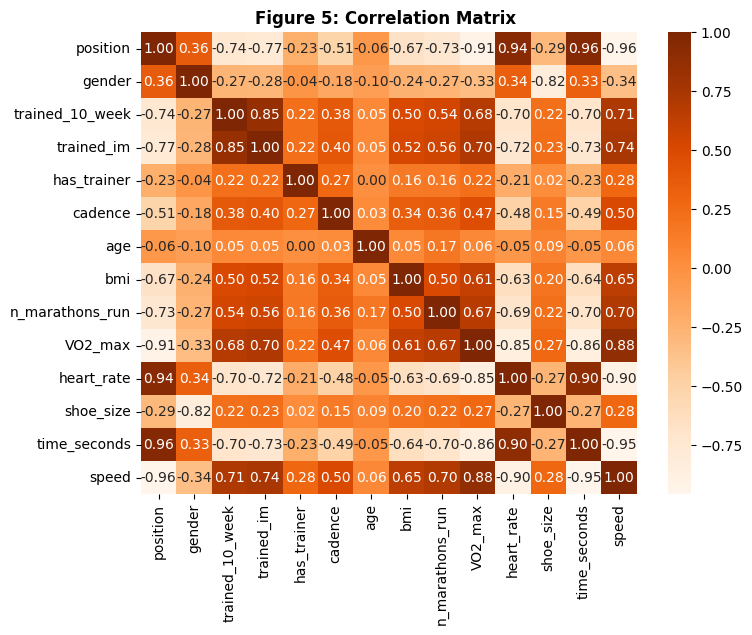

In [ ]:
correlation_matrix = marathon[['position', 'gender',
       'trained_10_week', 'trained_im', 'has_trainer', 'cadence', 'age', 'bmi',
       'n_marathons_run', 'VO2_max', 'heart_rate', 'shoe_size', 'time_seconds', 'speed']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
oranges = sns.color_palette("Oranges", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=oranges, fmt='.2f')
plt.title('Figure 5: Correlation Matrix ', fontweight='bold')
plt.show()

positive coefficient
- moderate : gender
- strong : heartrate

negative coefficient
- moderate : bib colour, bmi, shoe size
- strong : trained 10 week, trained im, n marathon run, VO2 max

# Modelling


In [ ]:
# Drop unncessary columns
marathon = marathon.drop(columns=['bib_colour', 'club', 'position_bin', 'position_category', 'position_bin_numeric','id'])
marathon.head()


position  gender  trained_10_week  trained_im  has_trainer  cadence   age  \
0         1       0         5.536638    5.536638            1      173  25.0   
1         2       0         5.258730    5.258730            1      177  61.0   
2         3       0         4.890384    5.328192            1      174  41.0   
3         4       0         4.693384    5.016947            1      176  42.0   
4         5       0         5.333973    5.333973            1      161  44.0   

     bmi  n_marathons_run  VO2_max  heart_rate  shoe_size  time_seconds  \
0  26.30             10.0    80.87       64.87         12          2775   
1  25.40             21.0    82.88       64.93         12          2804   
2  26.99             25.0    73.06       66.58         12          2816   
3  25.53              0.0    73.84       60.83          9          2833   
4  26.33              1.0    78.44       64.08          9          2839   

      speed  join_club   runner_category age_group  speed_bin trained_im_bin  
0  7.597477          1  Club and Trainer     20-40          8            5-6  
1  7.518902          1  Club and Trainer     60-80          8            5-6  
2  7.486861          1  Club and Trainer     40-60          8            5-6  
3  7.441934          1  Club and Trainer     40-60          8            5-6  
4  7.426206          1  Club and Trainer     40-60          8            5-6

## Standardization

In [ ]:
cols_to_standardize = [
    'trained_10_week', 'trained_im', 'cadence', 'age', 'bmi',
    'n_marathons_run', 'VO2_max', 'heart_rate', 'shoe_size', 'speed'
]

scaler = StandardScaler()

marathon[cols_to_standardize] = scaler.fit_transform(marathon[cols_to_standardize])


# Mutiple linear regression model

In [ ]:
# Create X and y
X = marathon.drop(['position', 'time_seconds','shoe_size','age', 'trained_im_bin', 'age_group','speed_bin','runner_category'], axis=1)
y = marathon['position']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2:.4f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

# Print model coefficients and intercept
print('\nModel Coefficients:')
for col, coef in zip(X.columns, model.coef_):
    print(f'{col}: {coef:.4f}')
print(f'Intercept: {model.intercept_:.4f}')

R-squared: 0.9617
Mean Absolute Error: 617.46
Mean Squared Error: 672207.24

Model Coefficients:
gender: 87.2917
trained_10_week: -77.6886
trained_im: -229.1957
has_trainer: 333.6730
cadence: -116.1479
bmi: -183.6744
n_marathons_run: -238.4216
VO2_max: -680.6071
heart_rate: 1253.6099
speed: -1756.2054
join_club: 117.1112
Intercept: 7191.9529


In [ ]:
# Add a constant to the independent variables for the intercept
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()

# Print the summary which includes p-values
print(results.summary())

# You can also access the p-values directly
p_values = results.pvalues
print("\nP-values for each independent variable:")
p_values


                            OLS Regression Results                            
Dep. Variable:               position   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 2.880e+04
Date:                Sun, 17 Aug 2025   Prob (F-statistic):               0.00
Time:                        05:22:46   Log-Likelihood:                -93964.
No. Observations:               11612   AIC:                         1.880e+05
Df Residuals:                   11600   BIC:                         1.880e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7191.9529     10.914    6

const               0.000000e+00
gender              3.817845e-08
trained_10_week     1.041426e-07
trained_im          3.888021e-51
has_trainer         6.576028e-23
cadence             8.665729e-41
bmi                 1.367582e-77
n_marathons_run    1.906119e-111
VO2_max             0.000000e+00
heart_rate          0.000000e+00
speed               0.000000e+00
join_club           4.268135e-08
dtype: float64

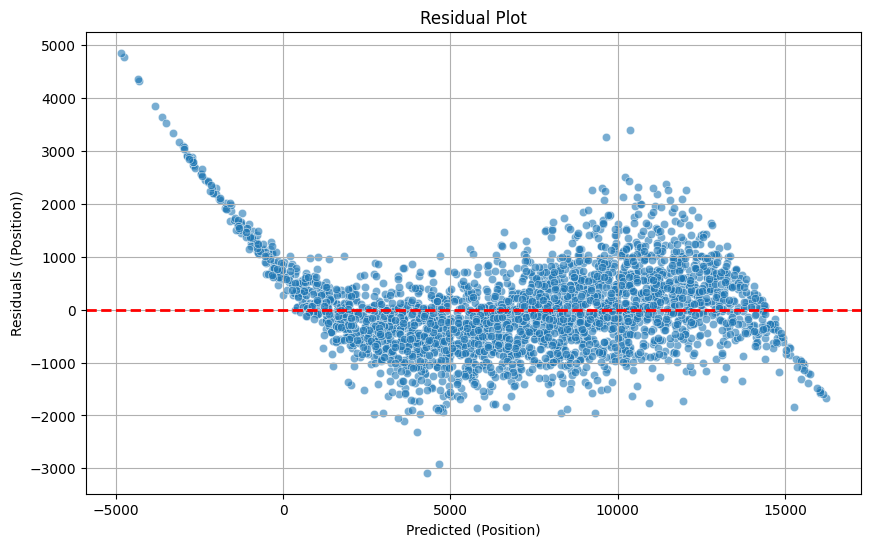

In [ ]:
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted (Position)')
plt.ylabel('Residuals ((Position))')
plt.grid(True)
plt.show()


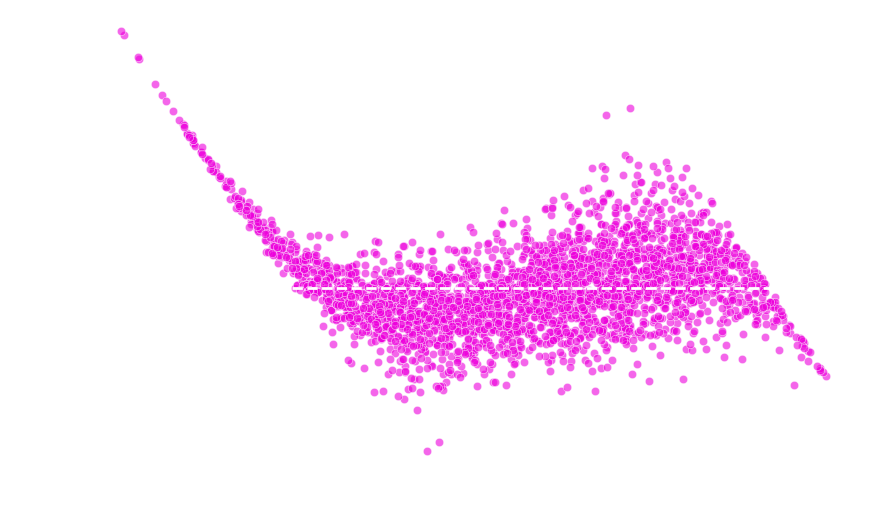

In [ ]:
# Plotting residuals
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color='#ED00DC')
plt.axhline(0, color='#FFFFFF', linestyle='--', linewidth=2)


# Set axis color to transparent and tick colors to white
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.xlabel('Predicted (Position)')
plt.ylabel('Residuals ((Position))')

# Set background to transparent
fig = ax.get_figure()
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

plt.show()

### I. Standardization

First, we apply the method of standardization with a main purpsose of adjust the data range (between 0 and 1) to prevent the features with larger ranges from dominating the analysis

### II. Data cleaning

To prevent, the analysis can be bias due to the impact of missing values or outliner, we already replace the bad input by applying the mean imputaion.

### III. Featuring

In order to give the best model, we have to select the relevant variable what match this below criteria:

1. Relevance to the Target Variable:

Not all variables in a dataset are equally informative for predicting the target outcome. Some variables may have little or no correlation with the target, and including them can introduce noise, reducing the model’s accuracy. By selecting relevant variables, the model focuses on data that meaningfully contributes to predictions.

2. Avoid Muticollinearity:

Variables should not repeat the same information. When variables are too similar, like measuring height in both inches and centimeters, they can confuse the model and make results hard to interpret. By selecting variables that provide unique information, the model becomes more reliable and easier to understand.

3. High predictive power:

Variables should strongly contribute to the model’s ability to predict the outcome. Some variables have a bigger impact on predictions than others, and including weak ones can complicate the model without adding value. You can measure predictive power using feature importance scores from models like random forests or by testing different variable combinations. Choosing variables with high predictive power improves the model’s accuracy while keeping it efficient.

4. Domain Relevance:

Variables should make sense for the problem based on expert knowledge. For example, in a medical model, blood pressure might be important, but a patient’s shoe size likely isn’t. Even if a variable seems statistically useful, it may not be relevant if it doesn’t fit the problem’s context.

**1. Gender:** Gender was chosen because it is relevant to marathon finishing time, as physiological differences between males and females can influence performance. The model’s coefficient (23.5663, p_value = 0.012) confirms its statistical significance, indicating a small but meaningful effect on time. Its inclusion is justified by domain knowledge, as gender is often a factor in sports science, and it likely has sufficient data quality and stability across runners.


**2. Trained_im:** The variable trained_im, likely indicating intensive training, was selected due to its strong relevance and predictive power, as training directly impacts running performance. The significant negative coefficient (-129.5937, p_value = 0.000) shows that training reduces finishing time, supporting its inclusion. It aligns with domain expertise in sports, where structured training is critical, and its binary nature ensures compatibility with OLS regression.


**3. Cadence:** Cadence (steps per minute) was included because it is a key biomechanical factor relevant to running efficiency and speed. Its coefficient (-11.7435, p_value = 0.007) indicates a significant effect, with higher cadence linked to faster times, confirming its predictive power. As a measurable and stable variable in sports science, cadence is domain-relevant and compatible with the model.

**4. Age:** Age was chosen because it is relevant to physical performance, as older runners may have slower times due to declining fitness. The model’s coefficient (11.8628, p_value = 0.007) shows a significant positive effect, supporting its predictive power. Age is a standard, high-quality variable in performance studies, ensuring its stability and compatibility with OLS regression.

**5. BMI:** BMI was selected due to its relevance to running performance, as body composition can affect endurance and speed. Despite its unexpected negative coefficient (-86.0551, p_value = 0.000), suggesting lower times with higher BMI, its strong significance indicates predictive power, possibly reflecting muscle mass in some runners. Its inclusion is supported by domain knowledge, though further investigation into data quality is warranted.

**6. N_marathons_run:** The number of marathons run was chosen for its relevance, as experience improves running efficiency and strategy. The large negative coefficient (-106.6361, p_value = 0.000) confirms its high predictive power, showing experienced runners finish faster. This variable is domain-relevant, stable, and compatible with the model, making it a strong choice.

**7. VO2_max:** VO2_max, a measure of aerobic capacity, was included due to its critical relevance to endurance performance in marathons. Its large negative coefficient (-281.1790, p_value = 0.000) highlights its strong predictive power, as higher VO2_max significantly reduces finishing time. As a well-established, high-quality metric in sports science, it is stable and compatible with OLS regression.

**8. Heart_rate:** Heart rate was selected because it reflects effort and efficiency during running, directly relating to performance. Its large positive coefficient (644.3067, p_value = 0.000) indicates that higher heart rates are associated with slower times, confirming its predictive power. As a domain-relevant and measurable variable, it is stable and suitable for the model.

**9. Join_club:** Joining a running club was chosen for its relevance, as club membership often provides structured training and support, improving performance. The significant negative coefficient (-55.4608, p_value = 0.000) shows it reduces finishing time, supporting its predictive power. This domain-relevant variable is likely binary, ensuring compatibility and stability in the model.
